<span style="color:#929591">Chapter 1.
# <span style="color:#820747">Flight Delays Prediction January 2018. EDA.

<img src="img/pl3.jpg">

<span style="color:#610023">In this Project, I will analyse Air Traffic across United State of America. I will focus only on Domestic Flights and at the first stage I will work with dataset for January 2018. This data was downloaded from "Bureau of Transportation Statistic". In downloaded dataset all 507007 records of Domestic Flights Flight in USA for 1st month of the year. 

<span style="color:#610023">I will show in the EDA part how each airline performing in delays, and how they performing in flights which departing before schedule. I will show how long in time could be delays and I will count them like outliers as this is unpredictable part of research. I will choose one aircompany and show how storm affect delays during the day and after the storm. I will put comments during this project for each part. 

<span style="color:#610023">Next chapters will be devoted to Machine Learning. During this project I will use libraries such as: Matplotlib, Seaborn, Basemap, Pandas, Numpy, Sklearn, Scipy, and many other libraries related to regression and classification modeling.

# <span style="color:#a83c09">Navigator:
<b>[Dictionary](img/dictionary.txt)

<b>[2. Delay. Prediction | Classification problem](./Chapter-2-features-creation-classification problem.ipynb)

<b>[3. Length of Delay. Prediction | Regression problem](./Chapter-3-regression_problem.ipynb)

<b>[4. Length Interval of Delay. Prediction | Classification problem](./Chapter-4-classification_problem_timeinterval.ipynb)

<img src="img/lin.jpg">

# <span style="color:#a83c09">Chapter Structure:

A. <b>SQL</b><br>
         1. Load datasets in to postgreSQL using created python engine.
         2. Using pgAdmin browser to combine my datasets with inner join command.
         3. Connect to pgAdmin and read my dataset into python dataframe.
         
B. <b>Exploratory Data Analysis</b><br>
         1. MAP: Airports activity during the month (Domestic Flights).
         2. Information: Basic about dataset.
         3. Table: More information about null percentage in my data.
         4. Format: Make Date and Time format more readable.
         5. Save: Columns order change and Saving finale file.
         6. Table: Departures before schedule and Delays.
         7. Graph: Domestic Departure Delays.
         8. Graph: Domestic Departure Before Schedule time.
         9. Graph: Duration of flight delays for each Air Company.
         10. Graph: Mean Departure Delays and Mean Delays on Arrival.
         11. Graph: Delays on Departure almost not affecting the speed of the plane.
         12. Winter Storm. 16 of January 2018.
         13. Graph: Average delay for Delta Airline during 17 of January.
         14. Graph: Average Delta AirLines delays during 18 of Jan after the storm.
         15. Graph: Number of visited airports during one month by each Air Company.
         16. Graph: Number of flights by time of the day.
         17. Graph: Box plot of length of delays.


<img src="img/lin.jpg">

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Loading libraries which I will use during first part of the project. I choose Basemap as it is a great tool for creating maps using python in a simple way. It’s a matplotlib extension, so it has got all its features to create data visualizations, and adds the geographical projections and some datasets to be able to plot coast lines, countries, and so on directly from the library.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import datetime, warnings, scipy 

from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
from scipy.optimize import curve_fit
from sqlalchemy import create_engine

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# <span style="color:#040273">Part A. SQL

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> I created my DataBase in postgreeSQL. After that I built engine to connect to my DataBase via python. I use pgAdmin browser and SQL queries to combine my datasets with INNER JOIN method. After that I write a query in python, and using my engine to connect to DataBase, I load my data in to Pandas DataFrame (df). You can see those files on a picture below.  

<img src="img/sql.jpg">

In [2]:
# 1. Creating engine
# ________________________________________________________
# engine = create_engine('postgresql://postgres:@localhost:5432/air_delay_db')
# flights.to_sql('flights', engine)
# airports.to_sql('airports', engine)
# airlines.to_sql('airlines', engine)

In [3]:
# 2. Example of query I used to inner join my data and renaming few columns:
# ________________________________________________________
# SELECT flights.*, "airports"."AIRPORT", "airports"."CITY", "airports"."STATE", "airports"."LATITUDE", "airports"."LONGITUDE"
# into test FROM flights INNER JOIN airports
# ON "flights"."ORIGIN_AIRPORT" = "airports"."IATA_CODE";

# ALTER TABLE flights_combo RENAME COLUMN “AIRPORT” TO “ORIGIN_AIRPORT”;
# ALTER TABLE flights_combo RENAME COLUMN "CITY" TO “ORIGIN_CITY”;
# ALTER TABLE flights_combo RENAME COLUMN "STATE" TO “ORIGIN_STATE”;
# ALTER TABLE flights_combo RENAME COLUMN "LATITUDE" TO “ORIGIN_LATITUDE”;
# ALTER TABLE flights_combo RENAME COLUMN "LONGITUDE"  TO “ORIGIN_LONGITUDE”;

In [4]:
# 3. Connect to SQL DataBase
# ________________________________________________________
#engine = create_engine('postgresql://postgres:@localhost:5432/air_delay_db')
# query = 'select * from flights_combo'
# df = sql.read_sql(query, con = engine)

# SAVING combined data into csv file
#df.to_csv('1_full_file_ready_to_slice.csv')

# <span style="color:#040273">Part B. Exploratory Data Analysis.

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Data isn't to bad and just minor cleaning required. One issue was that my dataset with Airport description was missing 28 airports. I found in my dataset all missing Airports and get them throughout browsing internet, and all needed information about them such as Latitude, Longitude, City, full name of Airport, State. I deleted some nulls using SQL queries from datasets which I will use to build map and graphs. More cleaning and nulls dropping will be made during that project on modeling part, where I will choose features I am going to use for my models in regression and classification problems.

In [5]:
# Load my 2 separate datasets in to two dataframes (df, df2)
# ________________________________________________________
df = pd.read_csv('flights_n.csv')
df2 = pd.read_csv('airlines_n_map.csv')

# <span style="color:#ffad01">1. MAP: <span style="color:#004577"> Airports activity during the month (Domestic Flights)

<span style="color:#be0119"><b>
--- comment ---</b>

<span style="color:#1e488f"> Using Basemap library I will show visually how big airports activity across US territory was in January 2018 for Domestic Flights. On this map I can see that more airports are located on the East of the country. Some islands has big number of flights during the month. Also I can see that airports with very high activity located not only on East but West.

<span style="color:#1e488f">I have 4 different colours to show how busy those airports was for Domestic Flights during Jan 2018:<br>

<span style="color:#d8dcd6">White circle - <span style="color:#3c0008">From <b>1 - 100</b> flights

<span style="color:#dbb40c">Yellow circle - <span style="color:#3c0008">From <b>100 to 1000</b> flights

<span style="color:#f97306">Orange circle - <span style="color:#3c0008">From <b>1000 to 10000</b> flights

<span style="color:red">Red circle - <span style="color:#3c0008">From <b>10000 to 100000</b> flights

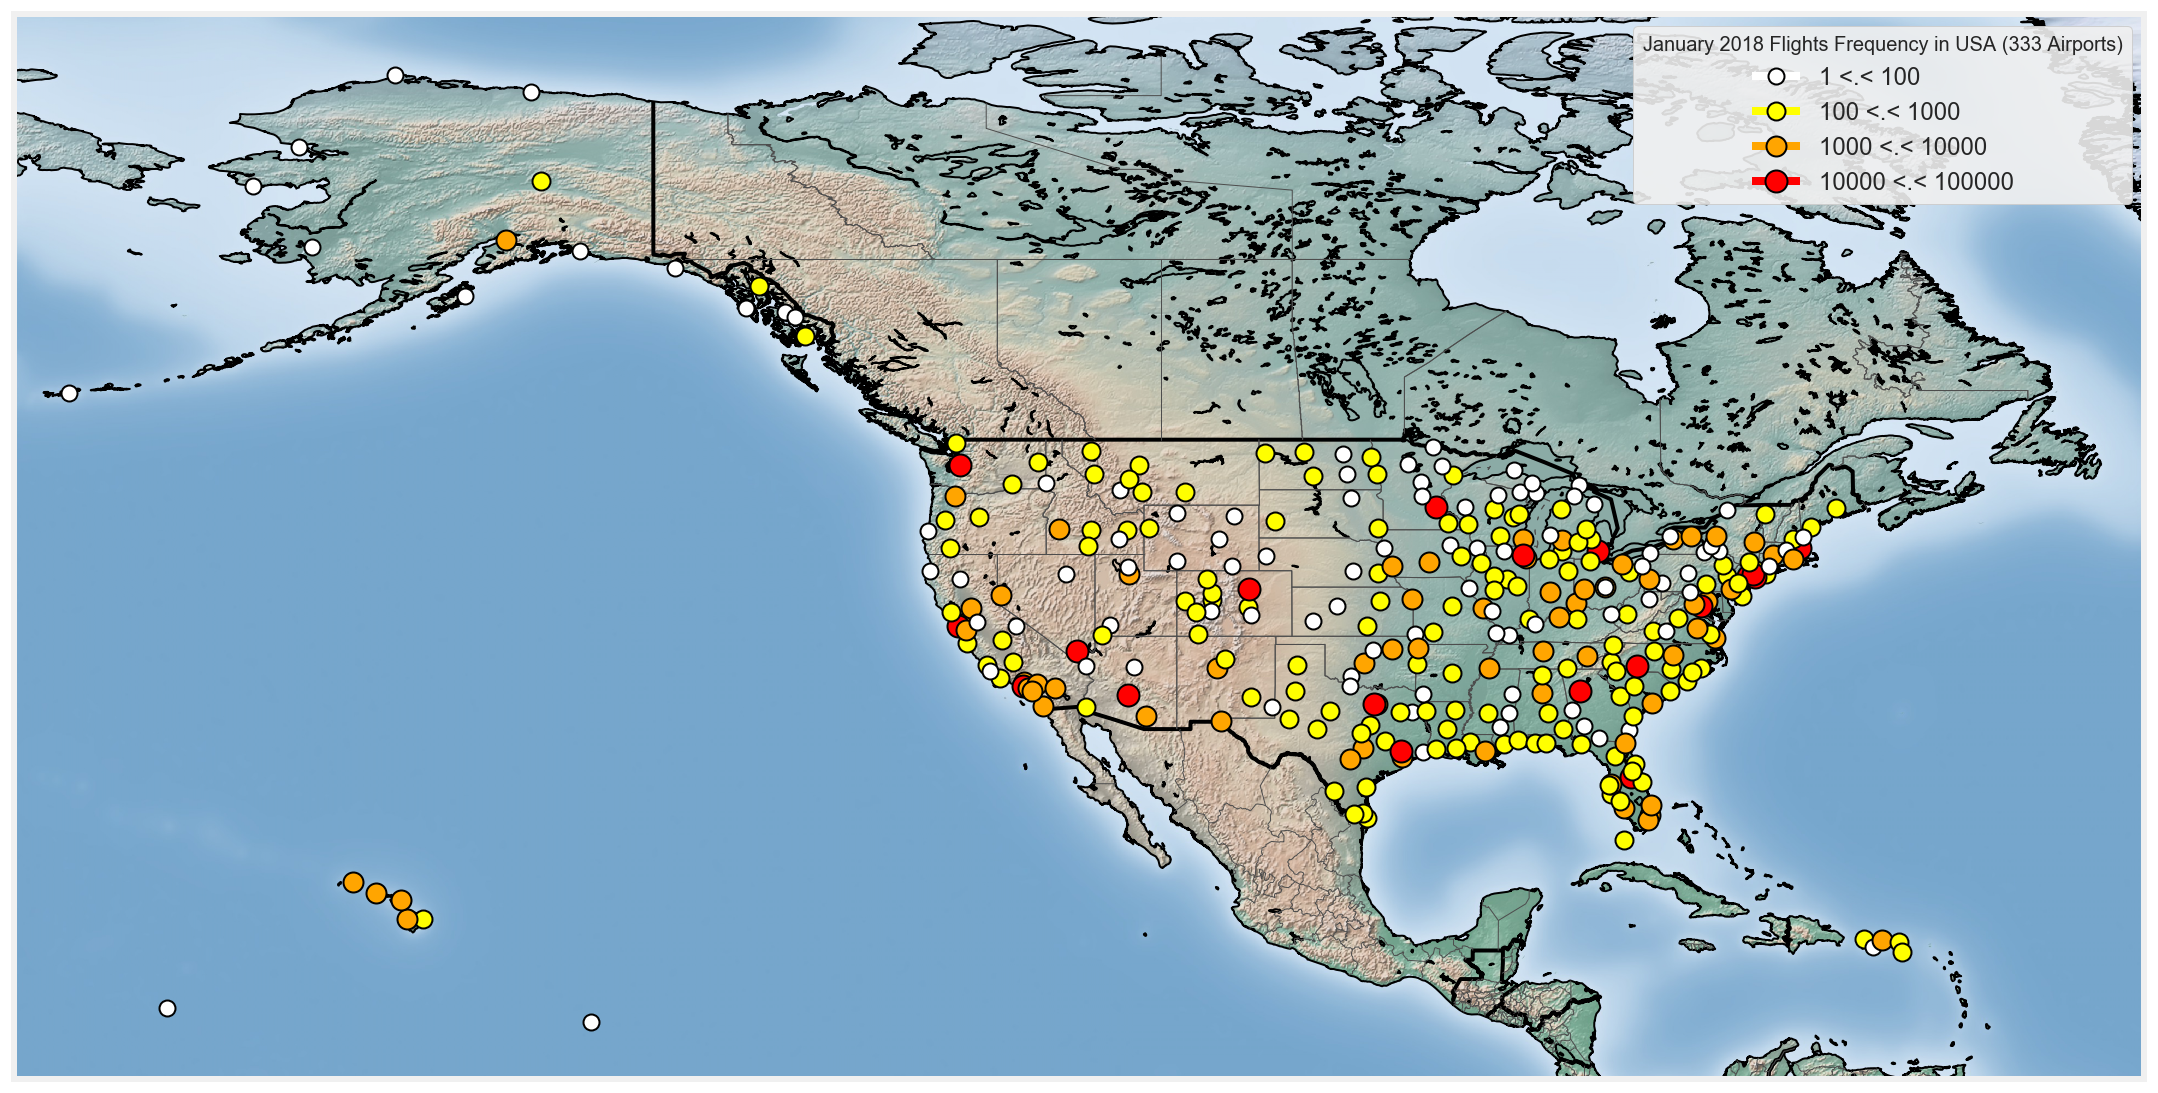

In [6]:
count_flights = df['ORIGIN_AIRPORT'].value_counts()
# ________________________________________________________
plt.figure(figsize=(17,17))
# ________________________________________________________
# define properties of markers and labels
colors = ['white', 'yellow', 'orange', 'red', 'black', 'purple']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]

labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
# ________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 2)
map.drawstates(color='0.3')
# ________________________________________________________
# put airports on map
for index, (code, y,x) in df2[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+8, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])
# ________________________________________________________
#remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':12},
           title='January 2018 Flights Frequency in USA (333 Airports)', frameon = True, framealpha = 0.9)
plt.show()

<img src="img/lin.jpg">

# <span style="color:#ffad01">2. Information: <span style="color:#004577">Basic about dataset

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">I load my combined dataset in to DataFrame and parsing parameter <b>low_memory = False</b>, to prevent warning messages, because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. And my dataset is big.<br>

<span style="color:#1e488f">My dataset is 570007 records, also has many columns, not all of them will be used during the project. To read description about each column you can follow <b>[This link](img/dictionary.txt)</b>. Also from data info I see that most of my features has numerical format.

In [7]:
%%time
df = pd.read_csv('flights_combo.csv', low_memory=False)

CPU times: user 6.32 s, sys: 685 ms, total: 7 s
Wall time: 7.02 s


In [8]:
df.columns

Index(['Unnamed: 0', 'index', 'ID', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE_CODE', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLED',
       'CANCELLATION_REASON', 'DIVERTED', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'AIRLINE_DELAY', 'WEATHER_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN', 'LATITUDE_ORIGIN',
       'LONGITUDE_ORIGIN', 'AIRLINE', 'AIRPORT_DESTINATION',
       'CITY_DESTINATION', 'STATE_DESTINATION', 'LATITUDE_DESTINATION',
       'LONGITUDE_DESTINATION'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570007 entries, 0 to 570006
Data columns (total 45 columns):
Unnamed: 0               570007 non-null int64
index                    570007 non-null int64
ID                       570007 non-null int64
YEAR                     570007 non-null int64
MONTH                    570007 non-null int64
DAY                      570007 non-null int64
DAY_OF_WEEK              570007 non-null int64
AIRLINE_CODE             570007 non-null object
TAIL_NUMBER              568038 non-null object
FLIGHT_NUMBER            570007 non-null int64
ORIGIN_AIRPORT           570007 non-null object
DESTINATION_AIRPORT      570007 non-null object
SCHEDULED_DEPARTURE      570007 non-null int64
DEPARTURE_TIME           553181 non-null float64
DEPARTURE_DELAY          552675 non-null float64
TAXI_OUT                 552935 non-null float64
WHEELS_OFF               552941 non-null float64
WHEELS_ON                552467 non-null float64
TAXI_IN                  5524

In [10]:
df.describe()

Unnamed: 0          index             ID      YEAR     MONTH  \
count  570007.000000  570007.000000  570007.000000  570007.0  570007.0   
mean   285003.000000  285003.000000  285018.931589    2018.0       1.0   
std    164546.991782  164546.991782  164569.740700       0.0       0.0   
min         0.000000       0.000000       1.000000    2018.0       1.0   
25%    142501.500000  142501.500000  142502.500000    2018.0       1.0   
50%    285003.000000  285003.000000  285004.000000    2018.0       1.0   
75%    427504.500000  427504.500000  427505.500000    2018.0       1.0   
max    570006.000000  570006.000000  570131.000000    2018.0       1.0   

                DAY    DAY_OF_WEEK  FLIGHT_NUMBER  SCHEDULED_DEPARTURE  \
count  570007.00000  570007.000000  570007.000000        570007.000000   
mean       15.93441       3.735561    2573.565391          1327.389793   
std         8.98312       1.985472    1886.280566           485.676347   
min         1.00000       1.000000       1.000000             1.000000   
25%         8.00000       2.000000     924.000000           915.000000   
50%        16.00000       4.000000    2028.000000          1320.000000   
75%        24.00000       5.000000    4041.000000          1730.000000   
max        31.00000       7.000000    7439.000000          2359.000000   

       DEPARTURE_TIME          ...           ELAPSED_TIME       AIR_TIME  \
count   553181.000000          ...           551583.00000  551583.000000   
mean      1333.657076          ...              136.88715     111.598506   
std        495.293294          ...               72.79785      71.018133   
min          1.000000          ...               16.00000       8.000000   
25%        922.000000          ...               84.00000      60.000000   
50%       1329.000000          ...              119.00000      93.000000   
75%       1738.000000          ...              168.00000     142.000000   
max       2400.000000          ...              728.00000     683.000000   

            DISTANCE  AIRLINE_DELAY  WEATHER_DELAY  AIR_SYSTEM_DELAY  \
count  570007.000000   97750.000000   97750.000000      97750.000000   
mean      793.980672      21.477023       4.750343         14.286425   
std       591.839474      66.453061      35.678748         32.457450   
min        31.000000       0.000000       0.000000          0.000000   
25%       357.000000       0.000000       0.000000          0.000000   
50%       632.000000       0.000000       0.000000          2.000000   
75%      1028.000000      19.000000       0.000000         19.000000   
max      4983.000000    2007.000000    1682.000000       1346.000000   

       SECURITY_DELAY  LATE_AIRCRAFT_DELAY  LATITUDE_ORIGIN  \
count    97750.000000         97750.000000    569651.000000   
mean         0.101668            25.645136        36.701901   
std          3.413014            50.412114         6.119408   
min          0.000000             0.000000        13.483450   
25%          0.000000             0.000000        33.434170   
50%          0.000000             1.000000        37.505170   
75%          0.000000            31.000000        40.777240   
max        593.000000          1648.000000       265.938800   

       LATITUDE_DESTINATION  
count         569651.000000  
mean              36.702600  
std                6.118281  
min               13.483450  
25%               33.434170  
50%               37.505170  
75%               40.777240  
max              265.938800  

[8 rows x 31 columns]

In [11]:
df.shape

(570007, 45)

<img src="img/lin.jpg">

# <span style="color:#ffad01">3. Table: <span style="color:#004577">More information about null percentage in my data.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">I created table to show how many null values my data has and what percentage out of all records it takes. I can make a conclusion I have good amount of not null values for my future work in modeling.

In [12]:
describe_box = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})
describe_box = describe_box.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null count'}))
describe_box = describe_box.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:"Null count (%)"}))
describe_box

Unnamed: 0  index     ID   YEAR  MONTH    DAY DAY_OF_WEEK  \
Type                int64  int64  int64  int64  int64  int64       int64   
Null count              0      0      0      0      0      0           0   
Null count (%)          0      0      0      0      0      0           0   

               AIRLINE_CODE TAIL_NUMBER FLIGHT_NUMBER          ...           \
Type                 object      object         int64          ...            
Null count                0        1969             0          ...            
Null count (%)            0    0.345434             0          ...            

               CITY_ORIGIN STATE_ORIGIN LATITUDE_ORIGIN LONGITUDE_ORIGIN  \
Type                object       object         float64           object   
Null count               0            0             356              356   
Null count (%)           0            0       0.0624554        0.0624554   

               AIRLINE AIRPORT_DESTINATION CITY_DESTINATION STATE_DESTINATION  \
Type            object              object           object            object   
Null count           0                   0                0                 0   
Null count (%)       0                   0                0                 0   

               LATITUDE_DESTINATION LONGITUDE_DESTINATION  
Type                        float64                object  
Null count                      356                   356  
Null count (%)            0.0624554             0.0624554  

[3 rows x 45 columns]

<img src="img/lin.jpg">

# <span style="color:#ffad01">4. Format: <span style="color:#004577">Make Date and Time format more readable.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">I have few different columns such as Year, Day, Month, Day of the week. Python has very convenient format <b>datetime</b>, that why I convert the dates in this format. Also some columns has time format where first two digits indicate the hour and the two last, the minutes. To solve this issues I used functions below to put everything in datetime format.

In [13]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [14]:
# Changing time format
# ________________________________________________________
def to_right_time(my_time):
    if pd.isnull(my_time):
        return np.nan
    else:
        if my_time == 2400: 
            my_time = 0
        my_time = '{0:04d}'.format(int(my_time))
        right_time = datetime.time(int(my_time[0:2]), int(my_time[2:4]))
        return right_time

# I use this function to combine data and time together.
# ________________________________________________________
def combine_date_right_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

# I use this function to combine two columns into one with datetime format
# ________________________________________________________
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_right_time(cols))
        else:
            cols[1] = to_right_time(cols[1])
            liste.append(combine_date_right_time(cols))
    return pd.Series(liste)


# Apply my functions to the columns which are required reformatting.
# ________________________________________________________
df.SCHEDULED_DEPARTURE = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df.DEPARTURE_TIME = df.DEPARTURE_TIME.apply(to_right_time)
df.WHEELS_OFF = df.WHEELS_OFF.apply(to_right_time)
df.WHEELS_ON = df.WHEELS_ON.apply(to_right_time)
df.SCHEDULED_ARRIVAL = df.SCHEDULED_ARRIVAL.apply(to_right_time)
df.ARRIVAL_TIME = df.ARRIVAL_TIME.apply(to_right_time)

In [15]:
# Actual departure time 
# ________________________________________________________
df.DEPARTURE_TIME.head(4)

0    09:41:00
1    09:42:00
2    09:38:00
3    09:36:00
Name: DEPARTURE_TIME, dtype: object

In [16]:
# Scheduled departure time
# ________________________________________________________
df.SCHEDULED_DEPARTURE.head(4)

0   2018-01-01 09:43:00
1   2018-01-02 09:43:00
2   2018-01-03 09:43:00
3   2018-01-04 09:43:00
Name: SCHEDULED_DEPARTURE, dtype: datetime64[ns]

<img src="img/lin.jpg">

# <span style="color:#ffad01">5. Save: <span style="color:#004577"> Columns order change and Saving final file.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">I change order of all columns in way I comfortable work with. And I saved my final dataset in to file '1_full_file_ready_to_slice.csv'. I will use this csv file along this project.

In [27]:
df = df[['ID', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_CODE', 'AIRLINE', 'TAIL_NUMBER','FLIGHT_NUMBER', 
        'DATE', 'ORIGIN_AIRPORT', 'AIRPORT_ORIGIN', 'CITY_ORIGIN', 'STATE_ORIGIN','LATITUDE_ORIGIN', 
        'LONGITUDE_ORIGIN', 'DESTINATION_AIRPORT', 'AIRPORT_DESTINATION', 'CITY_DESTINATION','STATE_DESTINATION', 
        'LATITUDE_DESTINATION', 'LONGITUDE_DESTINATION', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','DEPARTURE_DELAY', 
        'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY',
        'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED', 'SCHEDULED_TIME', 'ELAPSED_TIME','AIR_TIME', 'DISTANCE', 
        'AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ]]

In [30]:
df.head(1)

ID  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_CODE  \
0   1  2018      1    1            1           EV   

                       AIRLINE TAIL_NUMBER  FLIGHT_NUMBER       DATE  \
0  Atlantic Southeast Airlines      N617QX           2815 2018-01-01   

          ...         DIVERTED SCHEDULED_TIME ELAPSED_TIME AIR_TIME  DISTANCE  \
0         ...              0.0           96.0         85.0     62.0     383.0   

  AIRLINE_DELAY WEATHER_DELAY AIR_SYSTEM_DELAY SECURITY_DELAY  \
0           NaN           NaN              NaN            NaN   

  LATE_AIRCRAFT_DELAY  
0                 NaN  

[1 rows x 44 columns]

In [31]:
#df.to_csv('1_full_file_ready_to_slice.csv')
df_eda_1 = pd.read_csv('1_full_file_ready_to_slice.csv', low_memory=False)

<img src="img/lin.jpg">

# <span style="color:#ffad01">6. Table: <span style="color:#004577">Departures before schedule and Delays.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">To analyze departures which was made before schedule time and delays by each aircompany I split data on to two parts: Part1 - with delays, Part2 - with departure before schedule time. I will define two functions which will help me to get needed information from the columns I have to analyse and store it in a dictionary for the future transformation into DataFrame using <b>apply</b> method. I save then data with delays only. I will use <b>groupby</b> to group all air companies by delays and then apply my functions to get information I need. And final step I will use <b>concat</b> method to connect my two DataFrames together.

<span style="color:#1e488f">From the table we can see that, departures before schedule are more often happening than departures delays. I will show it on graph later to see how it looks like visually. Also Southwest Airlines seems to be a leader in delays, same as leader in departure before schedule, thats just because this company has more flights than another air companies. Maximum length of delay was recorded from <b>(AA) American Airlines</b> 33 hours, caused probably by weather or technical issues. Mean delay for all Air Companies is <b>41 minutes</b>, and Mean departure before schedule for all Air Companies is <b>-6 minutes</b>

In [34]:
# Split data with delays and departures before schedule
# ________________________________________________________
df_only_delays = df_eda_1.loc[df_eda_1.DEPARTURE_DELAY.values > 0]
df_only_before_schedule = df_eda_1.loc[df_eda_1.DEPARTURE_DELAY.values < 0]


# Defining two functions to get information from column I need.  
# ________________________________________________________
def result_aircompany_delays(x):
    return {'Max delay (min)' : x.max(), 'Times delay' : x.count(), 'Mean delay (min)' : x.mean()}

def result_aircompany_before_schedule(x):
    return {'Max Faster (min)' : x.min(), 'Times Faster' : x.count(), 'Mean Faster (min)' : x.mean()}

#df_only_delays.to_csv('df_only_delays.csv')

In [35]:
# Grouping my findings into one dataframe. 
# ________________________________________________________
result = df_only_delays['DEPARTURE_DELAY'].groupby(df_only_delays['AIRLINE']).apply(result_aircompany_delays).unstack()
result = result[['Times delay', 'Max delay (min)', 'Mean delay (min)']]

result2 = df_only_before_schedule['DEPARTURE_DELAY'].groupby(df_only_before_schedule['AIRLINE']).apply(result_aircompany_before_schedule).unstack()
result2 = result2[['Times Faster', 'Max Faster (min)', 'Mean Faster (min)']]

result_combo = pd.concat([result, result2], axis=1)
result_combo = result_combo.sort_values('Times delay', ascending=False)
result_combo

Times delay  Max delay (min)  Mean delay (min)  \
AIRLINE                                                                        
Southwest Airlines Co.            46368.0            558.0         22.941080   
American Airlines Inc.            22304.0           2007.0         33.349041   
Delta Air Lines Inc.              21646.0           1191.0         40.299270   
Skywest Airlines Inc.             18805.0           1503.0         63.350970   
United Air Lines Inc.             11867.0           1418.0         36.756720   
JetBlue Airways                   10560.0           1489.0         53.473295   
PSA Airlines                       8807.0            861.0         39.023050   
American Eagle Airlines Inc.       6946.0           1291.0         37.836741   
Republic Airlines                  6258.0           1270.0         43.833333   
Atlantic Southeast Airlines        5601.0           1458.0         62.434208   
Endeavor Air                       4774.0           1184.0         58.317972   
Messa Airlines                     4247.0           1489.0         46.381917   
Frontier Airlines Inc.             3677.0           1254.0         50.877074   
Spirit Air Lines                   3422.0           1363.0         41.810929   
Alaska Airlines Inc.               2752.0            495.0         27.021076   
Allegiant Air LLC                  2235.0            680.0         43.376286   
Hawaiian Airlines Inc.             1933.0           1700.0         18.638386   
Virgin America                     1495.0            520.0         31.293645   

                              Times Faster  Max Faster (min)  \
AIRLINE                                                        
Southwest Airlines Co.             52962.0             -49.0   
American Airlines Inc.             46868.0             -27.0   
Delta Air Lines Inc.               43891.0             -23.0   
Skywest Airlines Inc.              40375.0             -46.0   
United Air Lines Inc.              30728.0             -25.0   
JetBlue Airways                    12170.0             -32.0   
PSA Airlines                       10760.0             -31.0   
American Eagle Airlines Inc.       13620.0             -25.0   
Republic Airlines                  16774.0             -27.0   
Atlantic Southeast Airlines        13094.0             -24.0   
Endeavor Air                       11872.0             -32.0   
Messa Airlines                     10502.0             -24.0   
Frontier Airlines Inc.              5512.0             -30.0   
Spirit Air Lines                    9892.0             -34.0   
Alaska Airlines Inc.               12057.0             -50.0   
Allegiant Air LLC                   3739.0             -34.0   
Hawaiian Airlines Inc.              4411.0             -24.0   
Virgin America                      4074.0             -24.0   

                              Mean Faster (min)  
AIRLINE                                          
Southwest Airlines Co.                -3.823421  
American Airlines Inc.                -5.199475  
Delta Air Lines Inc.                  -4.399490  
Skywest Airlines Inc.                 -6.737412  
United Air Lines Inc.                 -5.689664  
JetBlue Airways                       -7.085374  
PSA Airlines                          -5.418680  
American Eagle Airlines Inc.          -5.256681  
Republic Airlines                     -6.038274  
Atlantic Southeast Airlines           -6.728043  
Endeavor Air                          -6.127527  
Messa Airlines                        -5.786231  
Frontier Airlines Inc.                -6.334906  
Spirit Air Lines                      -6.621613  
Alaska Airlines Inc.                  -8.996517  
Allegiant Air LLC                     -7.538647  
Hawaiian Airlines Inc.                -5.580367  
Virgin America                        -7.508346

In [40]:
mean_del = result_combo['Mean delay (min)'].sum() / len(result_combo['Mean delay (min)'])
mean_faster = result_combo['Mean Faster (min)'].sum() / len(result_combo['Mean Faster (min)'])
print('-----------------------------------------------------------')
print ('Mean before schedule for all AirCompanies == ({} min) == '.format(int(mean_faster)))
print('-----------------------------------------------------------')
print ('Mean delay for all AirCompanies == ({} min) == '.format(int(mean_del)))
print('-----------------------------------------------------------')

-----------------------------------------------------------
Mean before schedule for all AirCompanies == (-6 min) == 
-----------------------------------------------------------
Mean delay for all AirCompanies == (41 min) == 
-----------------------------------------------------------


<img src="img/lin.jpg">

# <span style="color:#ffad01">7. Graph: <span style="color:#004577">Domestic Departure Delays

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">I use <b>stripplot</b> from seaborn library to show delays for each air company. Each dot on the graph represents 1 single flight, and we can see some outliers here, such as <b>(AA) American Airlines</b> with more than 33 hours delay. <b>Virgin America</b> seems like they are pretty constant and dont have big outliers, it would be good choice if you would like to avoid delays on departure.

<img src="img/sign.jpg">

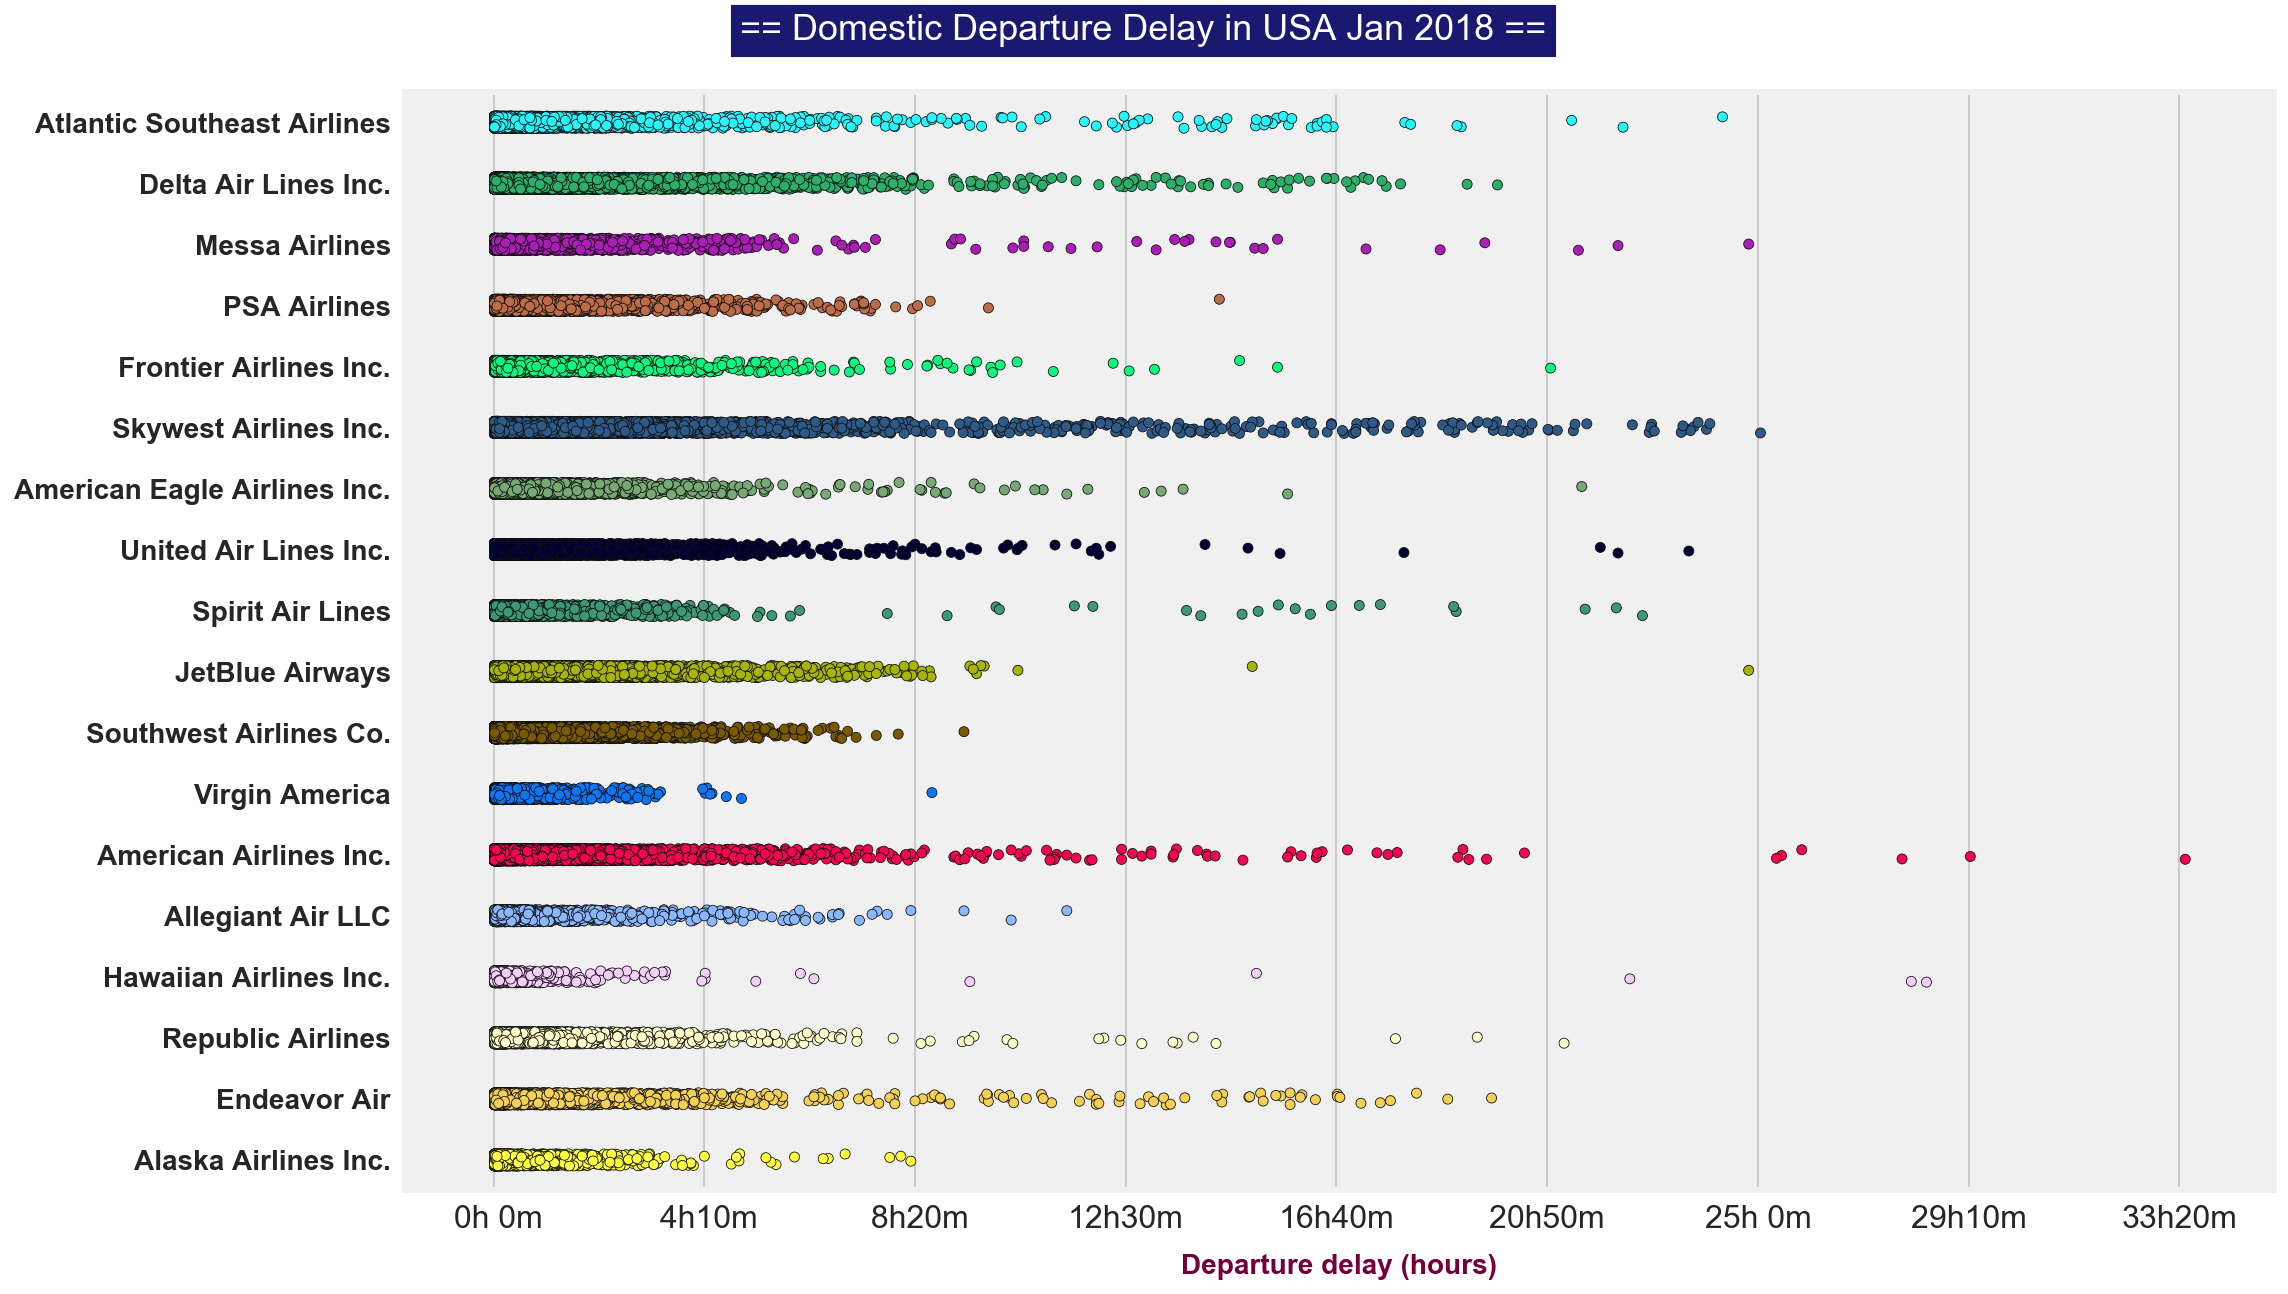

In [41]:
# SHOW IT VISUALY USING STRIPPLOT (DELAYS)
# ________________________________________________________
bars_colors = ['#26f7fd', '#2baf6a', '#ac1db8', '#bd6c48', '#0bf77d', '#2e5a88',
               '#76a973', '#000133', '#3d9973', '#a8b504', '#7a5901', '#0d75f8',
               '#f5054f', '#8ab8fe', '#f6cefc', '#ffffcb', '#f4d054', '#fffe40']

fig = plt.figure(1, figsize = (16,9))

df_air_depD = df_only_delays.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
pl = sns.stripplot(y = 'AIRLINE', x = 'DEPARTURE_DELAY', size = 5, palette = bars_colors, data = df_air_depD,
                   linewidth = 0.4, jitter = True)

plt.setp(pl.get_xticklabels(), fontsize = 16)
plt.setp(pl.get_yticklabels(), fontsize = 14, weight = 'bold')
pl.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in pl.get_xticks()])
pl.yaxis.label.set_visible(False)
plt.tight_layout(w_pad = 3)

plt.suptitle('== Domestic Departure Delay in USA Jan 2018 ==', fontsize = 18, bbox = {'facecolor' : 'midnightblue', 'pad' : 5},
           color = 'w')
plt.subplots_adjust(top=0.92)
plt.xlabel('Departure delay (hours)',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

<img src="img/lin.jpg">

# <span style="color:#ffad01">8. Graph: <span style="color:#004577">Domestic Departure Before Schedule time

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">On the graph with departure before schedule time I can see that Alaska Airlines seems like they are leaders. I think delays and departure before schedule depending on how busy home airport for such air companies. If we back to our map, we can see that Alaska region has not many flights compare to another area of US. That why I think airports in Alaska has small air traffic. It also make sense of Alaska Air do flights between airports in Alaska area more times than to anywhere else. I will investigate it in next graphs. 

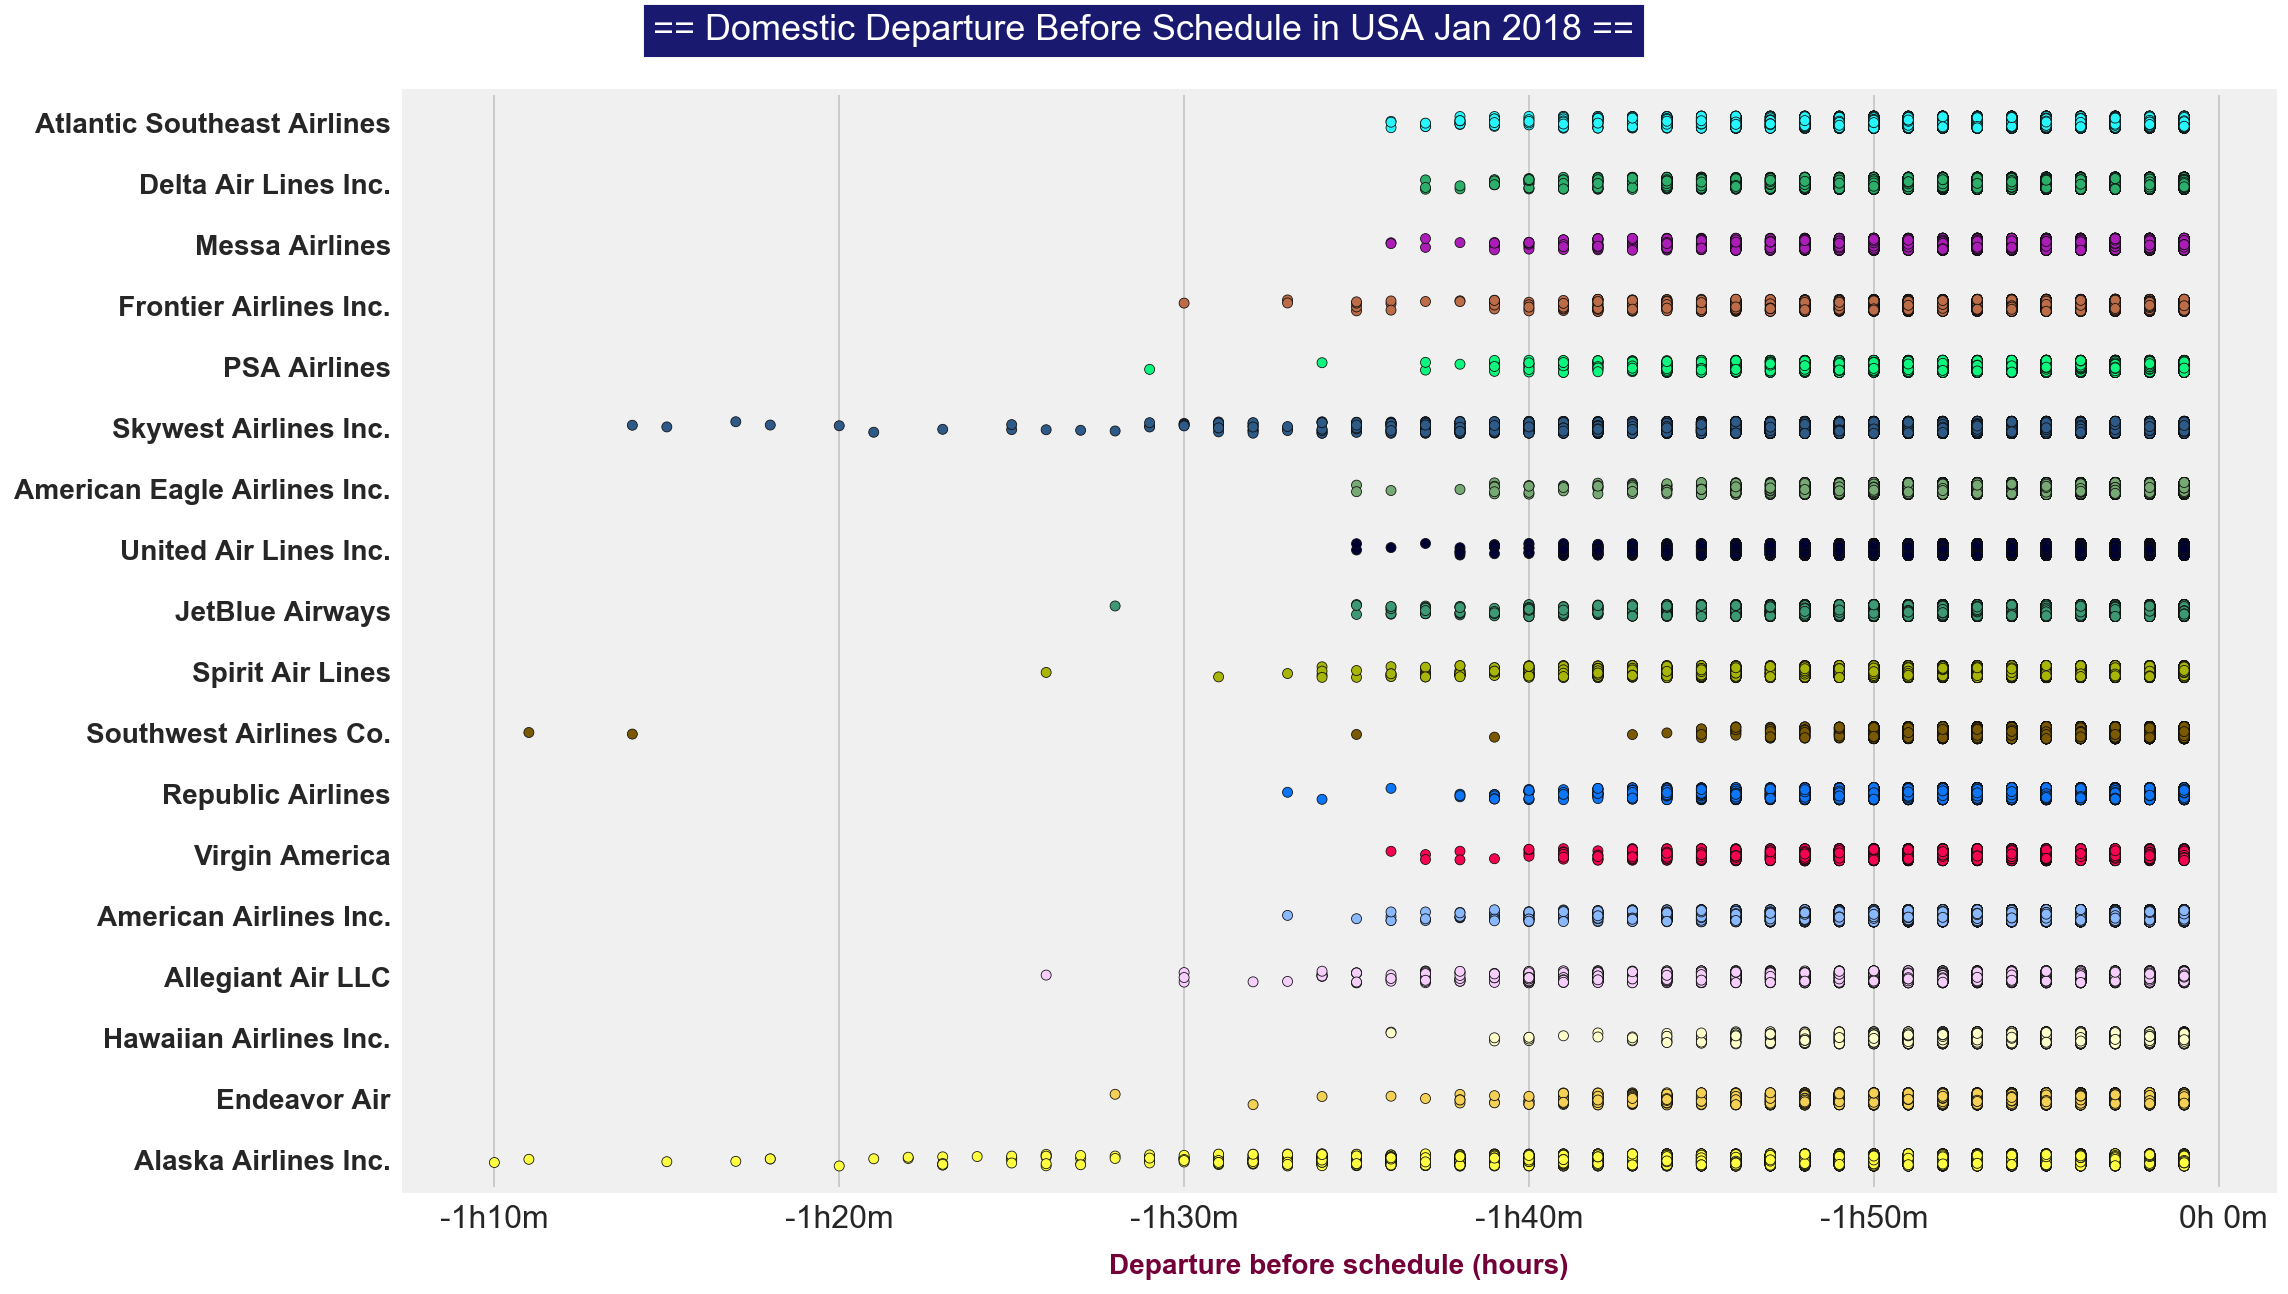

In [42]:
# SHOW IT VISUALY USING STRIPPLOT (BEFORE SCHEDULE)
# ________________________________________________________
bars_colors = ['#26f7fd', '#2baf6a', '#ac1db8', '#bd6c48', '#0bf77d', '#2e5a88',
               '#76a973', '#000133', '#3d9973', '#a8b504', '#7a5901', '#0d75f8',
               '#f5054f', '#8ab8fe', '#f6cefc', '#ffffcb', '#f4d054', '#fffe40']

fig = plt.figure(1, figsize = (16,9))

df_air_depD = df_only_before_schedule.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
pl = sns.stripplot(y = 'AIRLINE', x = 'DEPARTURE_DELAY', size = 5, palette = bars_colors, data = df_air_depD,
                   linewidth = 0.4, jitter = True)

plt.setp(pl.get_xticklabels(), fontsize = 16)
plt.setp(pl.get_yticklabels(), fontsize = 14, weight = 'bold')
pl.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in pl.get_xticks()])
pl.yaxis.label.set_visible(False)
plt.tight_layout(w_pad = 3)

plt.suptitle('== Domestic Departure Before Schedule in USA Jan 2018 ==', fontsize = 18, bbox = {'facecolor' : 'midnightblue', 'pad' : 5},
           color = 'w')
plt.subplots_adjust(top=0.92)
plt.xlabel('Departure before schedule (hours)',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

In [45]:
# Load only delays in to variable df_groups_delay.
# ________________________________________________________
df_groups_delay = pd.read_csv('df_only_delays.csv', low_memory=False)

<img src="img/lin.jpg">

# <span style="color:#ffad01">9. Graph: <span style="color:#004577">Duration of flight delays for each Air Company

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">For this graph I split length of delays by 3 groups: Group 1 - no delays or delay less than 5 min, Group 2 - delays from 5 min to 45 min, Group 3 - delays more than 45 min. We can see that in all cases medium delays is prevails, also <b>Skywest Airline</b> has high frequency for long delays when <b>Hawaiian Airlines</b> has low frequency. Also as <b>Southwest Airlines</b> has many flights, more than 25000 for medium delays, theirs bars a very large. 

<span style="color:green"><b>Green bars -<span style="color:#3c0008"> no delays or less than ( 5 min )

<span style="color:blue"><b>Blue bars -<span style="color:#3c0008"> medium delay from ( 5 to 45 min )

<span style="color:red"><b>Red bars -<span style="color:#3c0008"> long delay more than ( 45 min )

In [46]:
# I use lambda function to split delay time into 3 groups, and create new column with those groups. 
# ________________________________________________________
group = lambda x : ((0, 1)[x > 5], 2)[x > 45]
df_groups_delay['GROUPS'] = df_groups_delay['DEPARTURE_DELAY'].apply(group)
df_groups_delay.GROUPS.unique()

array([2, 1, 0])

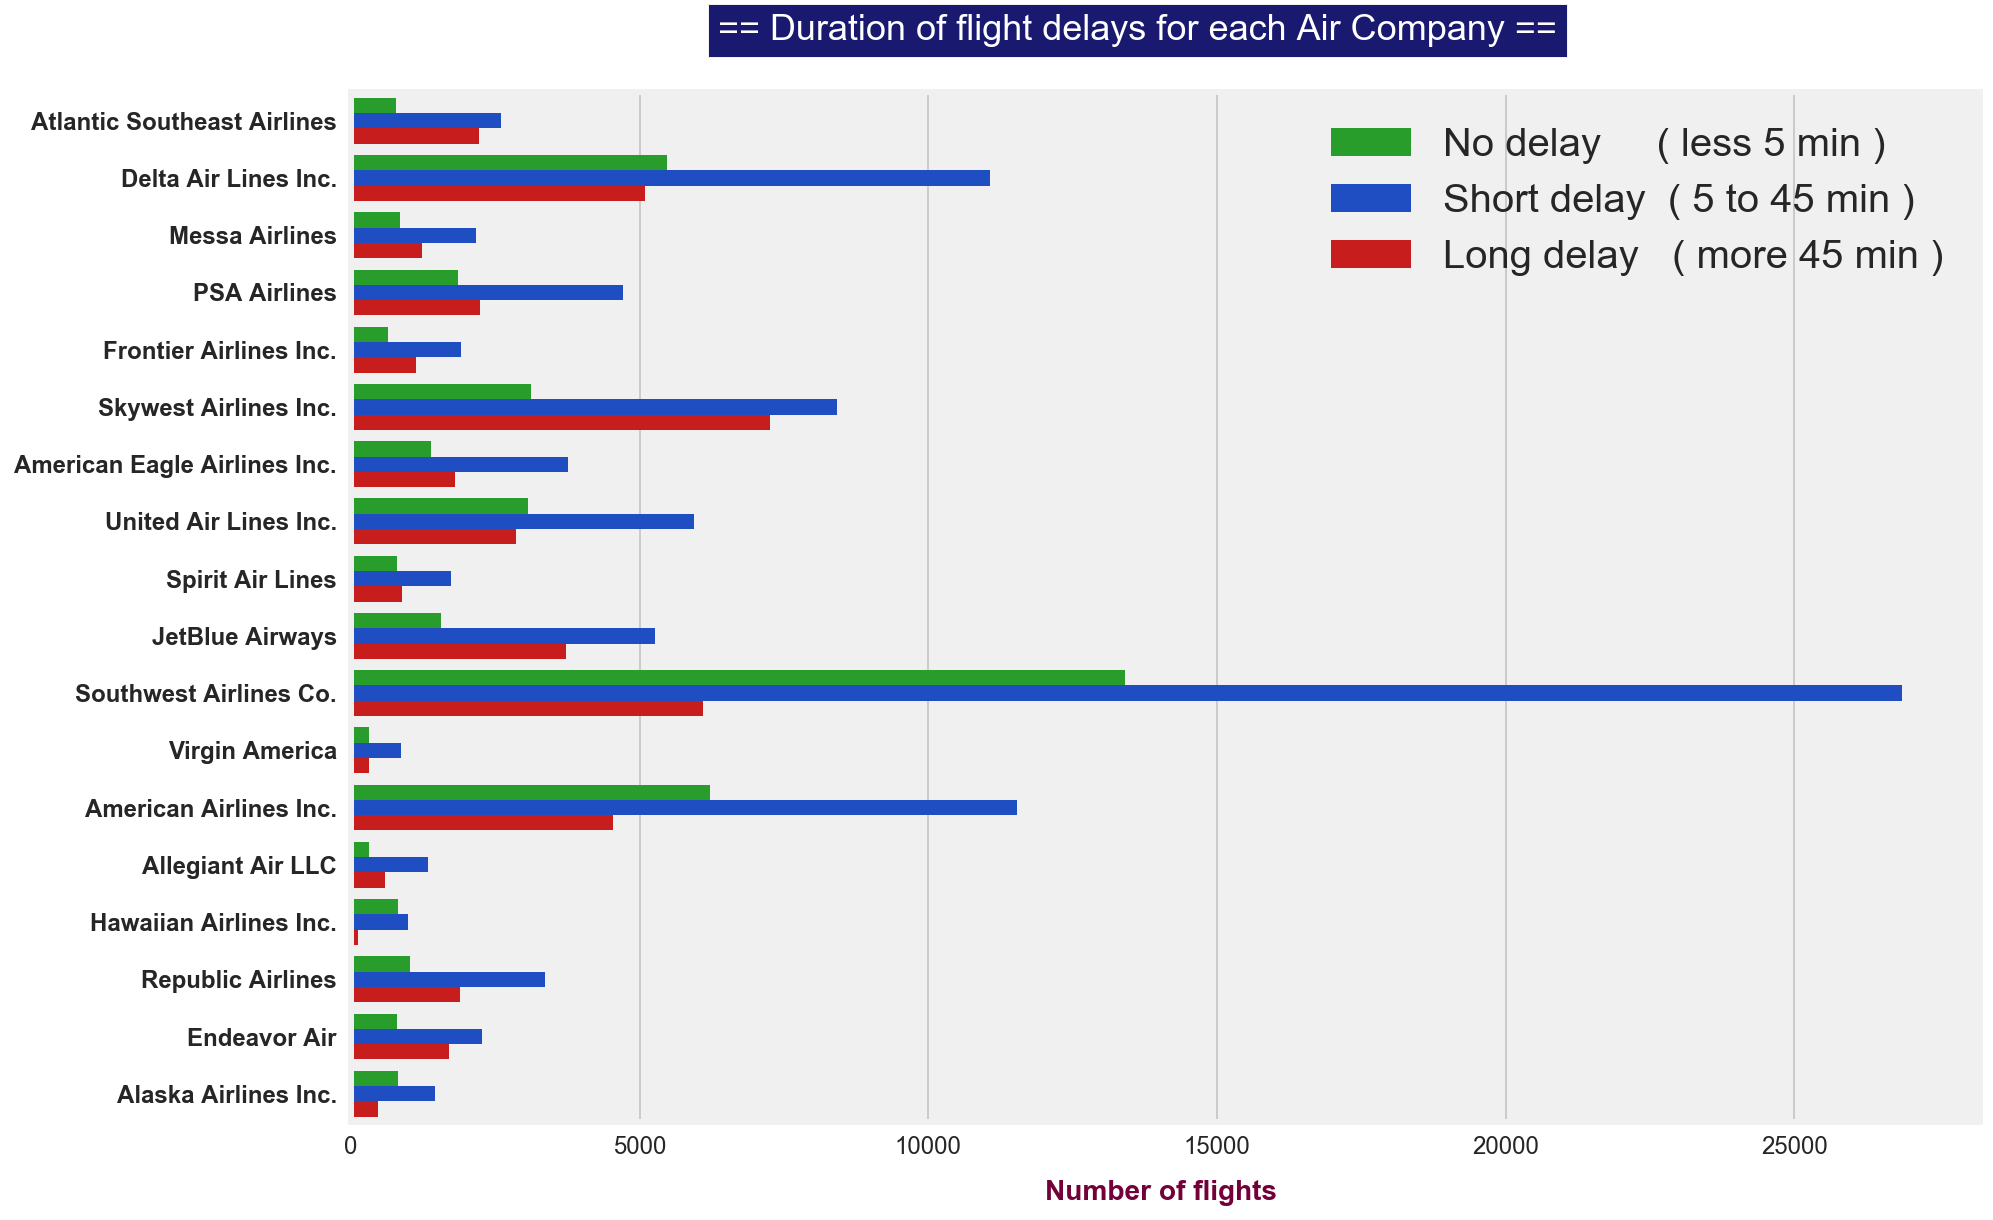

In [47]:
bars_colors2 = ['green', 'blue', 'red']
               
fig = plt.figure(1, figsize = (13, 9))
ax = sns.countplot(y = 'AIRLINE', hue = 'GROUPS', data = df_groups_delay, palette=sns.xkcd_palette(bars_colors2))

labels = [[df_groups_delay.AIRLINE.values] for i in ax.get_yticklabels()]
plt.setp(ax.get_xticklabels(), fontsize = 12, weight = 'normal', rotation = 0)
plt.setp(ax.get_yticklabels(), fontsize = 12, weight = 'bold', rotation = 0)
ax.yaxis.label.set_visible(False)
plt.xlabel('Number of Flights', fontsize = 16, weight = 'bold', labelpad = 10)

L = plt.legend(fontsize = 20)
L.get_texts()[0].set_text('No delay     ( less 5 min )')
L.get_texts()[1].set_text('Short delay  ( 5 to 45 min )')
L.get_texts()[2].set_text('Long delay   ( more 45 min )')

plt.suptitle('== Duration of flight delays for each Air Company ==', fontsize = 18, bbox = {'facecolor' : 'midnightblue', 'pad' : 5},
           color = 'w')
plt.subplots_adjust(top=0.92)
plt.xlabel('Number of flights ',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

plt.show()

<img src="img/lin.jpg">

# <span style="color:#ffad01">10. Graph: <span style="color:#004577">Mean Departure Delays and Mean Delays on Arrival

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">Next graph I made shows Mean of Delays on Departure and Mean Delays on Arrival for each air company. We can see that delays on departure are bigger than delays on arrival. By my experience in Air Industry I can say that because almost all flights usually have small reserve in time seted by air companies. It is because Air Companies taking into account few possible small delays such as weather condition, air condition (delays related to ground services after plane taxiing out from the gate) and other. But this reservation in time very small. Pilots also can in some cases increase speed, not too much thought and it will not giving big effect especially on short flights. It is not that easy like on car for pilots increase speed. There are few factors which not allowed increase the speed such as: weight of fuel and altitude they are flying. When plane using his fuel then plane become lighter and can fly higher then. Pilots can request from air traffic controllers if they can change altitude on higher one and increase speed. Also Air Traffic controllers trying to give priority for landing when it is possible for the planes coming with a delay. All together this factors can make delay on arrival shorter than on departure. 

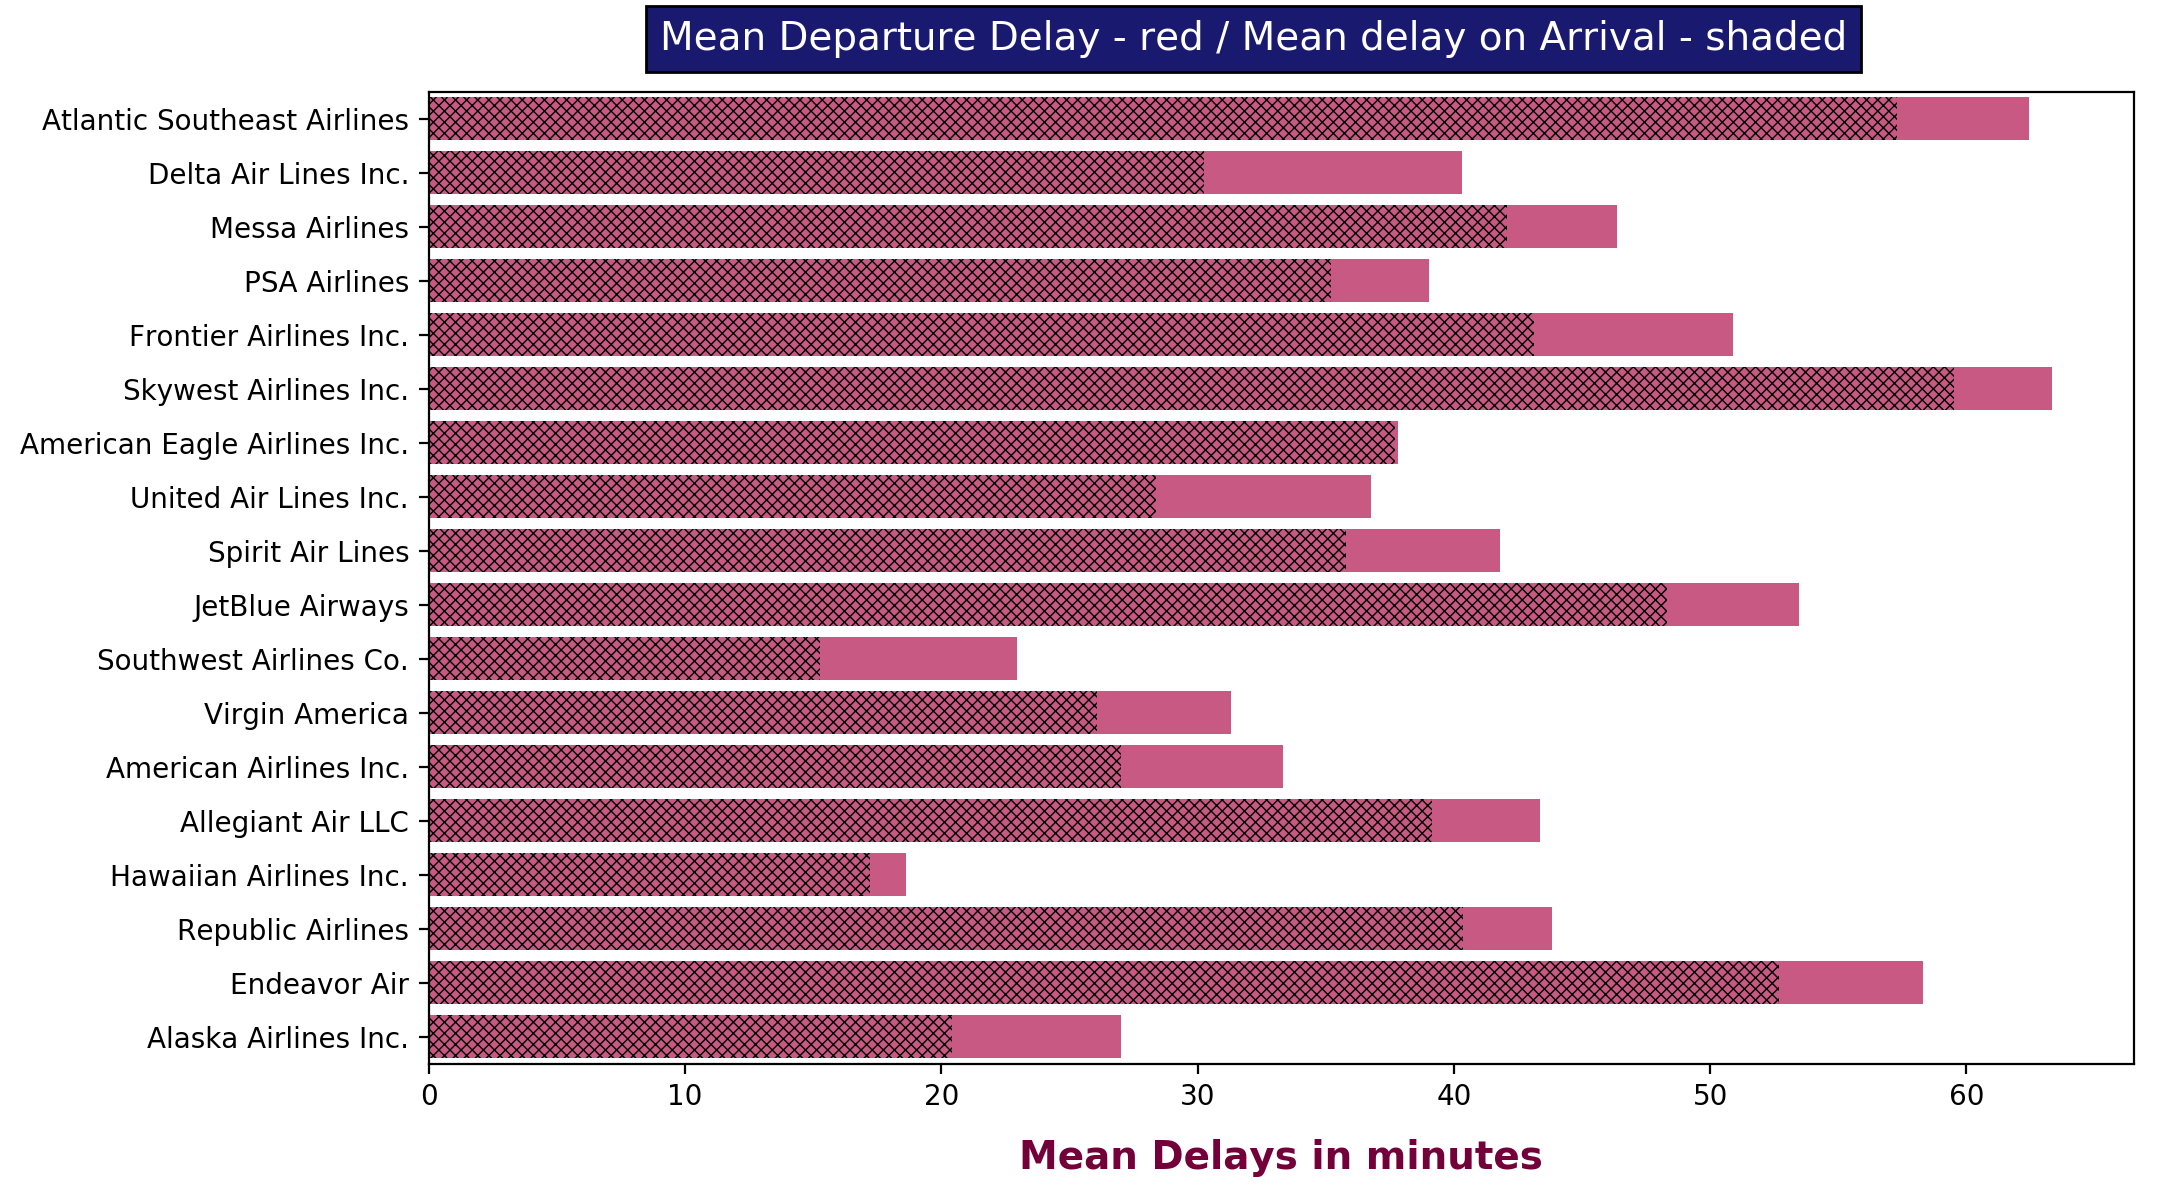

In [48]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 0.5  

fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = "DEPARTURE_DELAY", y = "AIRLINE", data = df_only_delays, color = "#da467d", ci = None)
ax = sns.barplot(x = "ARRIVAL_DELAY", y = "AIRLINE", data = df_only_delays, hatch = 'xxxxxx', alpha = 0.0, ci = None)

labels = [[df_groups_delay.AIRLINE.values] for item in ax.get_yticklabels()]
ax.yaxis.label.set_visible(False)

plt.suptitle('Mean Departure Delay - red / Mean delay on Arrival - shaded', fontsize = 14, bbox = {'facecolor' : 'midnightblue', 'pad' : 5},
           color = 'w')
plt.subplots_adjust(top=0.92)
plt.xlabel('Mean Delays in minutes',
           fontsize=14, weight = 'bold', labelpad=10, color='#730039');

<img src="img/lin.jpg">

# <span style="color:#ffad01">11. Graph: <span style="color:#004577">Delays on Departure almost not affecting the speed of the plane.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">To check my statement that pilots cant just increase the speed if plane was delayed on departure, I will show it on two graphs using <r>violinplot</b> from seaborn library. <b>Graph 1</b> - average speed for all air companies without delays on departure, <b>Graph 2</b> - average speed for all air companies with delay on departure. I converted speed into km/h. White dots on the plot represents mean of the speed. As we can see mean speed without delays is <b>642 km/h</b> and speed with delays on departure is <b>650 km/h</b>. The difference is only <b>8 km/h</b>. It is means if length of the flight is approximately 5 hours, that plane can make around <b>40 kilometers</b> with increasing speed of the plane.

<img src="img/carplane.jpg">

/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


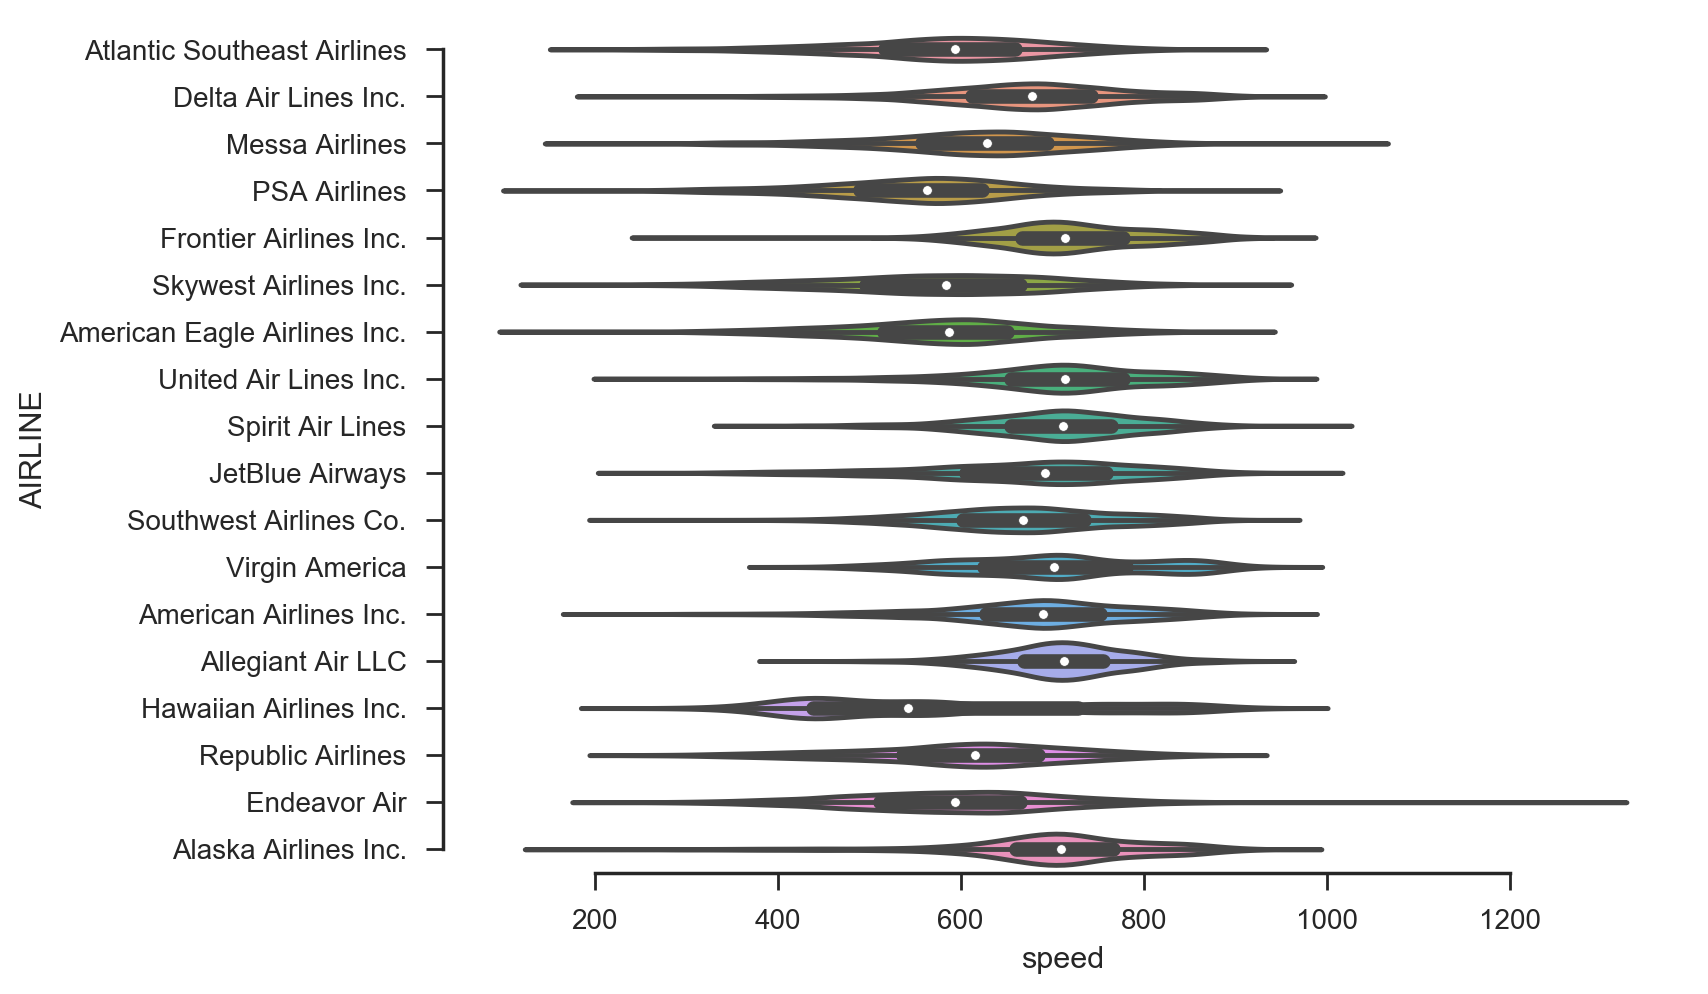

In [53]:
# With delays. To km/h *1.61
# ________________________________________________________
df_only_delays['speed'] = 60*df_only_delays['DISTANCE'] / df_only_delays['AIR_TIME']*1.61
sns.set_context("notebook", font_scale=2.5)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="speed", y="AIRLINE", data=df_only_delays);
sns.despine(trim=True)

/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


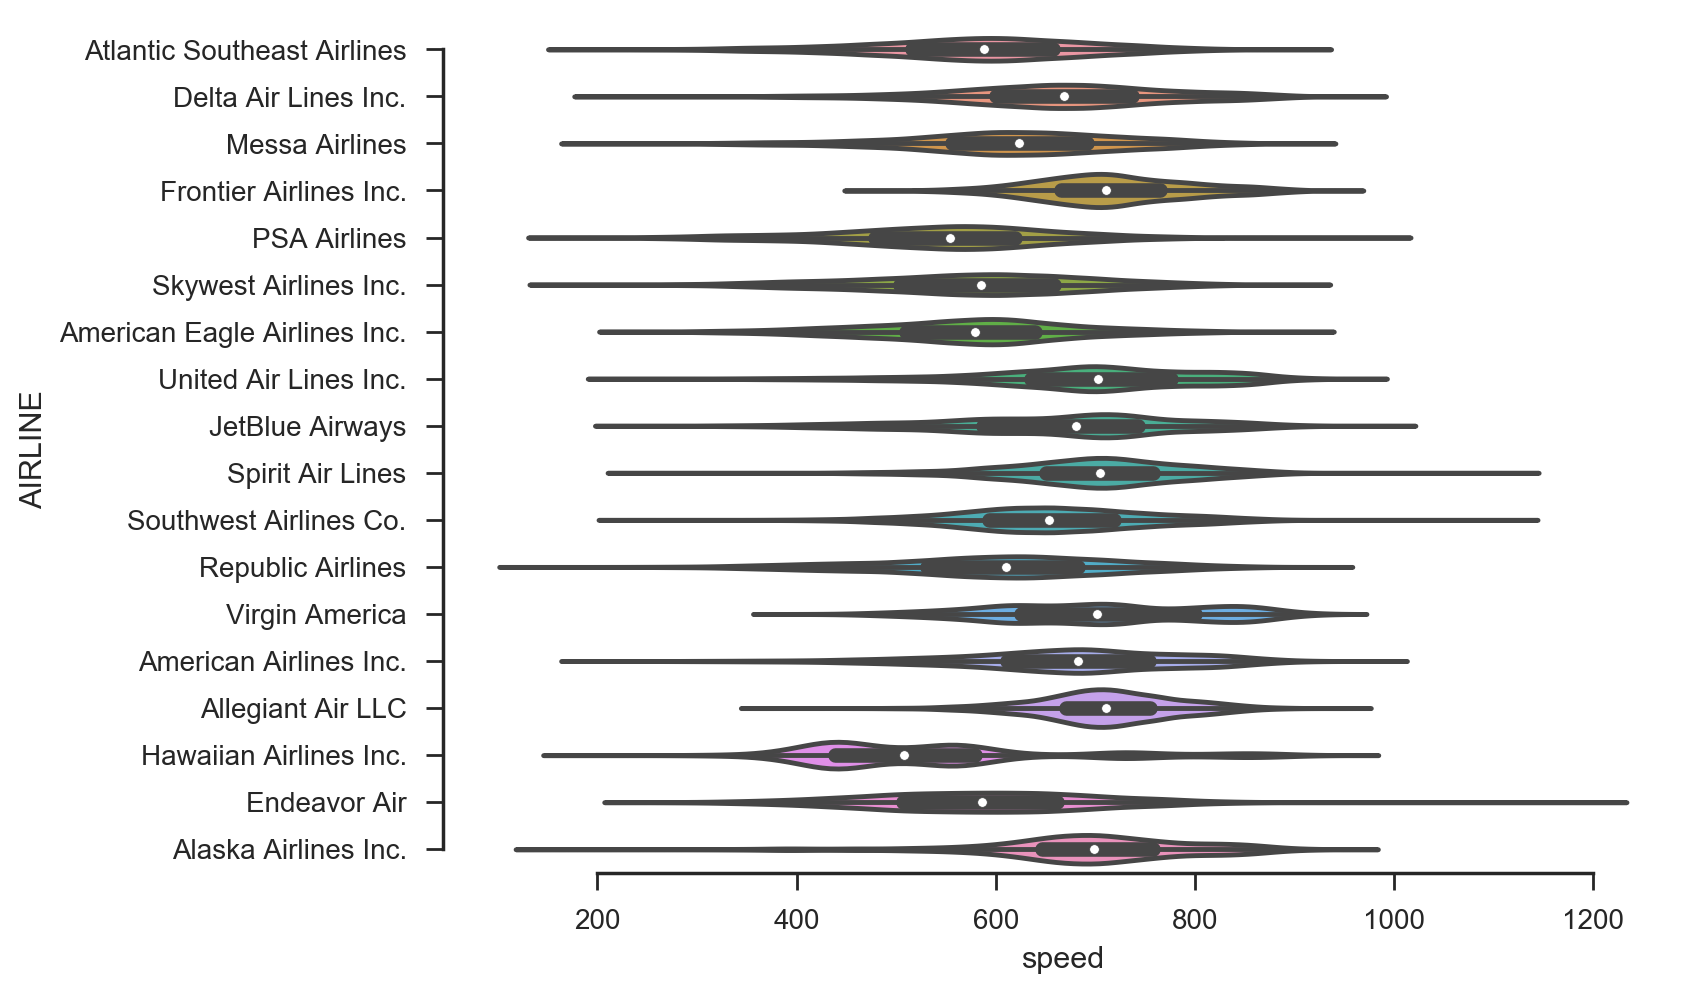

In [50]:
# Without delays
# ________________________________________________________
df_only_before_schedule['speed'] = 60*df_only_before_schedule['DISTANCE'] / df_only_before_schedule['AIR_TIME']*1.61
sns.set_context("notebook", font_scale=2.5)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="speed", y="AIRLINE", data=df_only_before_schedule);
sns.despine(trim=True)

In [51]:
print('Mean speed if there was no delay: ',df_only_before_schedule.speed.mean())
print('---------------------------------------------------')
print('Mean speed if there was delay: ',df_only_delays.speed.mean())

Mean speed if there was no delay:  642.6953767904022
---------------------------------------------------
Mean speed if there was delay:  650.2282195487458


<img src="img/lin.jpg">

# <span style="color:#004577">12. Winter Storm. 16 of January 2018.

<img src="img/us_storm.jpg">

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">Winter Storm Closes Dozen of Airports from or through Atlanta, Albany, Augusta and Columbus in Georgia; Birmingham, Mobile, Montgomery, Huntsville and Dothan in Alabama; New Orleans, Baton Rouge, Lafayette, Shreveport, Alexandria and Monroe in Louisiana; Raleigh-Durham, Asheville, Charlotte, Fayetteville, Greensboro in North Carolina; Charlotte; Columbia and Greenville-Spartanburg in South Carolina; Columbus, Gulfport and Jackson in Mississippi; Chattanooga, Memphis, Nashville, Knoxville and Tri-City in Tennessee; and Little Rock, Arkansas. 

<span style="color:#1e488f">During the storm <b>on 16-17</b> of January was cancelled <b>3665</b> Domestic Flights. 

<span style="color:#1e488f">In this part I will create few dataframes which I will use for my graph. Also I will use <b>class Figure_style</b> to plot mean of delays for one choosen air company <b>(Delta Airlines Inc.)</b> during 16 and 17 of January to show how weather impacted delays. 

In [57]:
# Count cancelled flights during 16 and 17 of January. 
# ________________________________________________________
storm16 = df_eda_1.loc[df_eda_1.DAY == 16]
storm17 = df_eda_1.loc[df_eda_1.DAY == 17]

storm = storm16.CANCELLED.value_counts() + storm17.CANCELLED.value_counts()
print('During storm on  (16-17 January)  was cancelled', storm[1], 'Domestic Flights')

During storm on  (16-17 January)  was cancelled 3665 Domestic Flights


In [58]:
# Slice only information I need. 
# ________________________________________________________
df_airline_depdel = df_groups_delay.loc[:, ['AIRLINE', 'DEPARTURE_DELAY', 'SCHEDULED_DEPARTURE']]
df_airline_depdel.tail(7)

AIRLINE  DEPARTURE_DELAY  SCHEDULED_DEPARTURE
183690  Alaska Airlines Inc.             84.0  2018-01-31 15:00:00
183691  Alaska Airlines Inc.             29.0  2018-01-31 15:45:00
183692  Alaska Airlines Inc.             29.0  2018-01-31 08:30:00
183693  Alaska Airlines Inc.              5.0  2018-01-31 12:10:00
183694  Alaska Airlines Inc.             33.0  2018-01-31 09:20:00
183695  Alaska Airlines Inc.             14.0  2018-01-31 15:25:00
183696  Alaska Airlines Inc.              4.0  2018-01-31 11:50:00

In [59]:
# 1. Make my 'SCHEDULED DEPARTURE' column in to datetime format so I could read it.
# 2. Get only time and create new column for it 'heure depart'
# 3. Create new column 'date depart' with only date.
# 4. Create new column 'day only' with day of the month only. 
# ________________________________________________________
df_airline_depdel['new_DT_format']= pd.to_datetime(df_airline_depdel.SCHEDULED_DEPARTURE)
df_airline_depdel['heure_depart'] =  df_airline_depdel['new_DT_format'].apply(lambda x: x.time())
df_airline_depdel['date_depart'] =  df_airline_depdel['new_DT_format'].apply(lambda x: x.date())
df_airline_depdel['day_only'] = df_only_delays.DAY.values

In [60]:
df_airline_depdel.head(2)

AIRLINE  DEPARTURE_DELAY  SCHEDULED_DEPARTURE  \
0  Atlantic Southeast Airlines             76.0  2018-01-08 09:43:00   
1  Atlantic Southeast Airlines            174.0  2018-01-24 09:43:00   

        new_DT_format heure_depart date_depart  day_only  
0 2018-01-08 09:43:00     09:43:00  2018-01-08         8  
1 2018-01-24 09:43:00     09:43:00  2018-01-24        24

In [61]:
# Create 2 DataFrames: 1 for 17 of January. 2 for 18 of January.
# ________________________________________________________
df1 = df_airline_depdel[df_airline_depdel['AIRLINE'] == 'Delta Air Lines Inc.']
df1 = df1[df1['day_only'] == 17]
df111 = df_airline_depdel[df_airline_depdel['AIRLINE'] == 'Delta Air Lines Inc.']
df111 = df111[df111['day_only'] == 18]

In [62]:
df1.head(2)

AIRLINE  DEPARTURE_DELAY  SCHEDULED_DEPARTURE  \
10153  Delta Air Lines Inc.             60.0  2018-01-17 19:28:00   
10154  Delta Air Lines Inc.             59.0  2018-01-17 11:35:00   

            new_DT_format heure_depart date_depart  day_only  
10153 2018-01-17 19:28:00     19:28:00  2018-01-17        17  
10154 2018-01-17 11:35:00     11:35:00  2018-01-17        17

In [63]:
df111.head(2)

AIRLINE  DEPARTURE_DELAY  SCHEDULED_DEPARTURE  \
11402  Delta Air Lines Inc.             38.0  2018-01-18 13:25:00   
11403  Delta Air Lines Inc.             12.0  2018-01-18 14:35:00   

            new_DT_format heure_depart date_depart  day_only  
11402 2018-01-18 13:25:00     13:25:00  2018-01-18        18  
11403 2018-01-18 14:35:00     14:35:00  2018-01-18        18

In [64]:
df_airline_depdel.dtypes

AIRLINE                        object
DEPARTURE_DELAY               float64
SCHEDULED_DEPARTURE            object
new_DT_format          datetime64[ns]
heure_depart                   object
date_depart                    object
day_only                        int64
dtype: object

In [65]:
# Use this class to plot my next two graphs. 
# ________________________________________________________
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='#ff9408', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='#beae8a', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = '#ff9408', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])

In [66]:
# Function that extract statistical parameters from object:
# ________________________________________________________
def stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

<img src="img/lin.jpg">

# <span style="color:#ffad01">13. Graph: <span style="color:#004577">Average delay for Delta AirLines during 17 of January.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">On this graph we can see how weather affected all delays for Delta Airline during 17 of January. Mean of the delays was slightly more than <b>150 min</b>, also we can see many flight reaches delays <b>300 min</b> and higher. And we can see for the "Delta Airlines" almost no flights during night time. It might be because most airports are closed at night time or Air Company planning their flights this way.

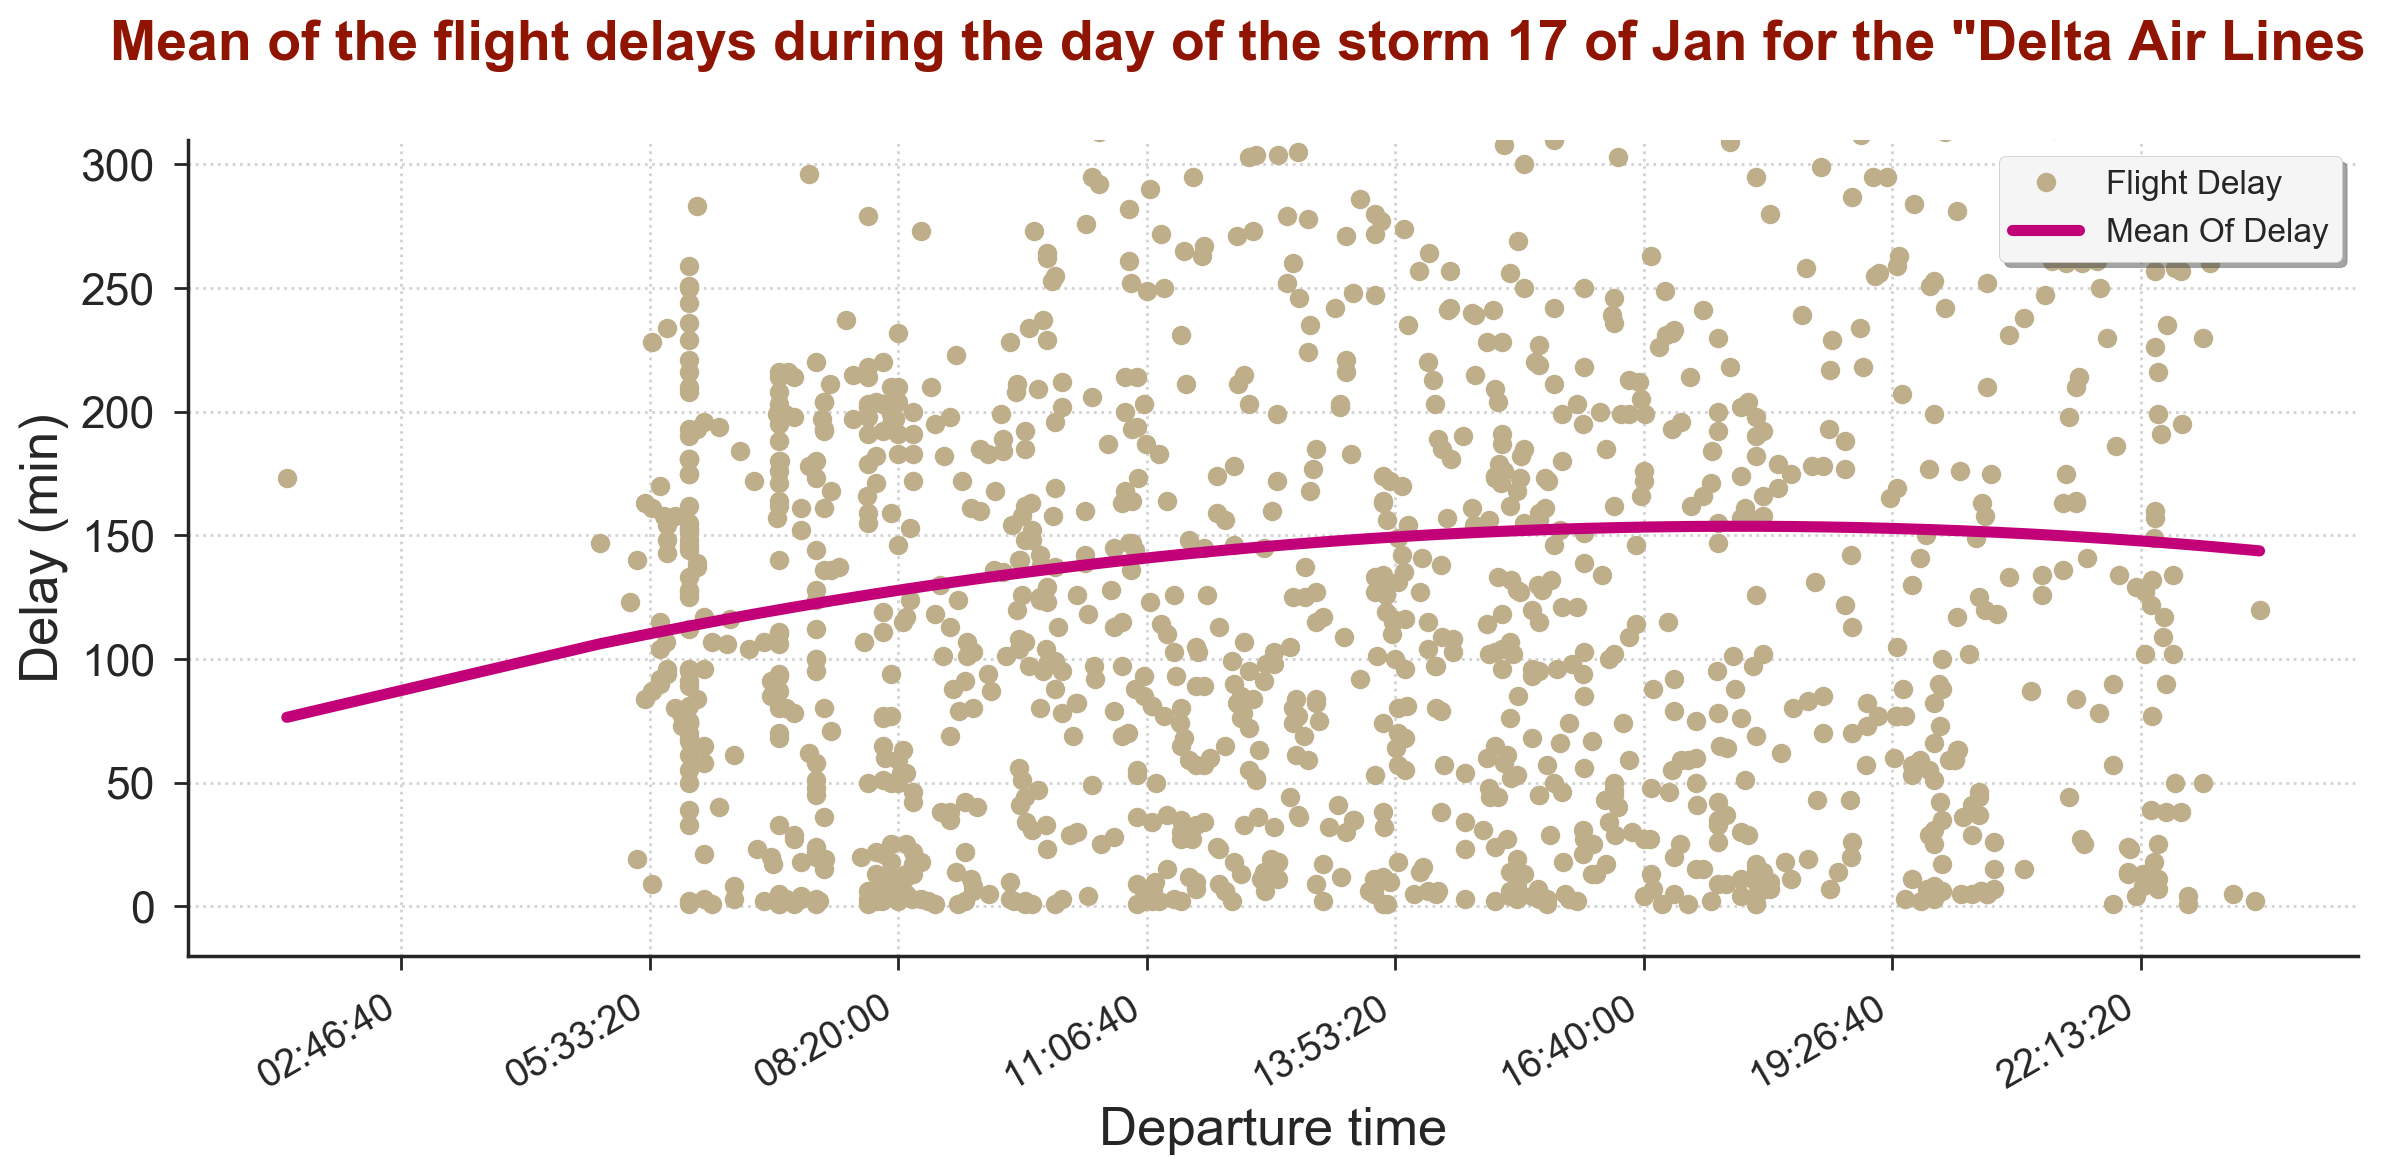

In [67]:
# Function that counts mean time of the delay during the day.
# ________________________________________________________
def func123(x, a, b, c):
    return a * x**2 +  b*x + c

test2 = df1['DEPARTURE_DELAY'].groupby(df1['heure_depart']).apply(stats).unstack()
fct = lambda x: x.hour * 3600 + x.minute * 60 + x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func123, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func123(x_val, *popt), index = test2.index)

fig1 = Figure_style(14, 6, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df1['heure_depart'], df1['DEPARTURE_DELAY'], markeredge=False, label='Flight Delay')
fig1.cust_plot(test2.index, test2['fit'], color='#c20078', linestyle='-', linewidth=4, label='Mean Of Delay')
fig1.style() ; fig1.draw_legend('upper right')
plt.suptitle('Mean of the flight delays during the day of the storm 17 of Jan for the "Delta Air Lines', size=20, color='#8f1402', weight = 'bold')
fig1.set_ylabel('Delay (min)', fontsize = 19)
fig1.set_xlabel('Departure time', fontsize = 19)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
fig1.set_ylim(-20, 310)

<img src="img/lin.jpg">

# <span style="color:#ffad01">14. Graph: <span style="color:#004577">Average Delta AirLines delays during 18 of Jan after the storm.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">This second graph cleary shows us difference between day with bad weather and on the day after the storm. It dropped to 40 min during the day. Best time to travel in this case between 12pm and 16pm. 

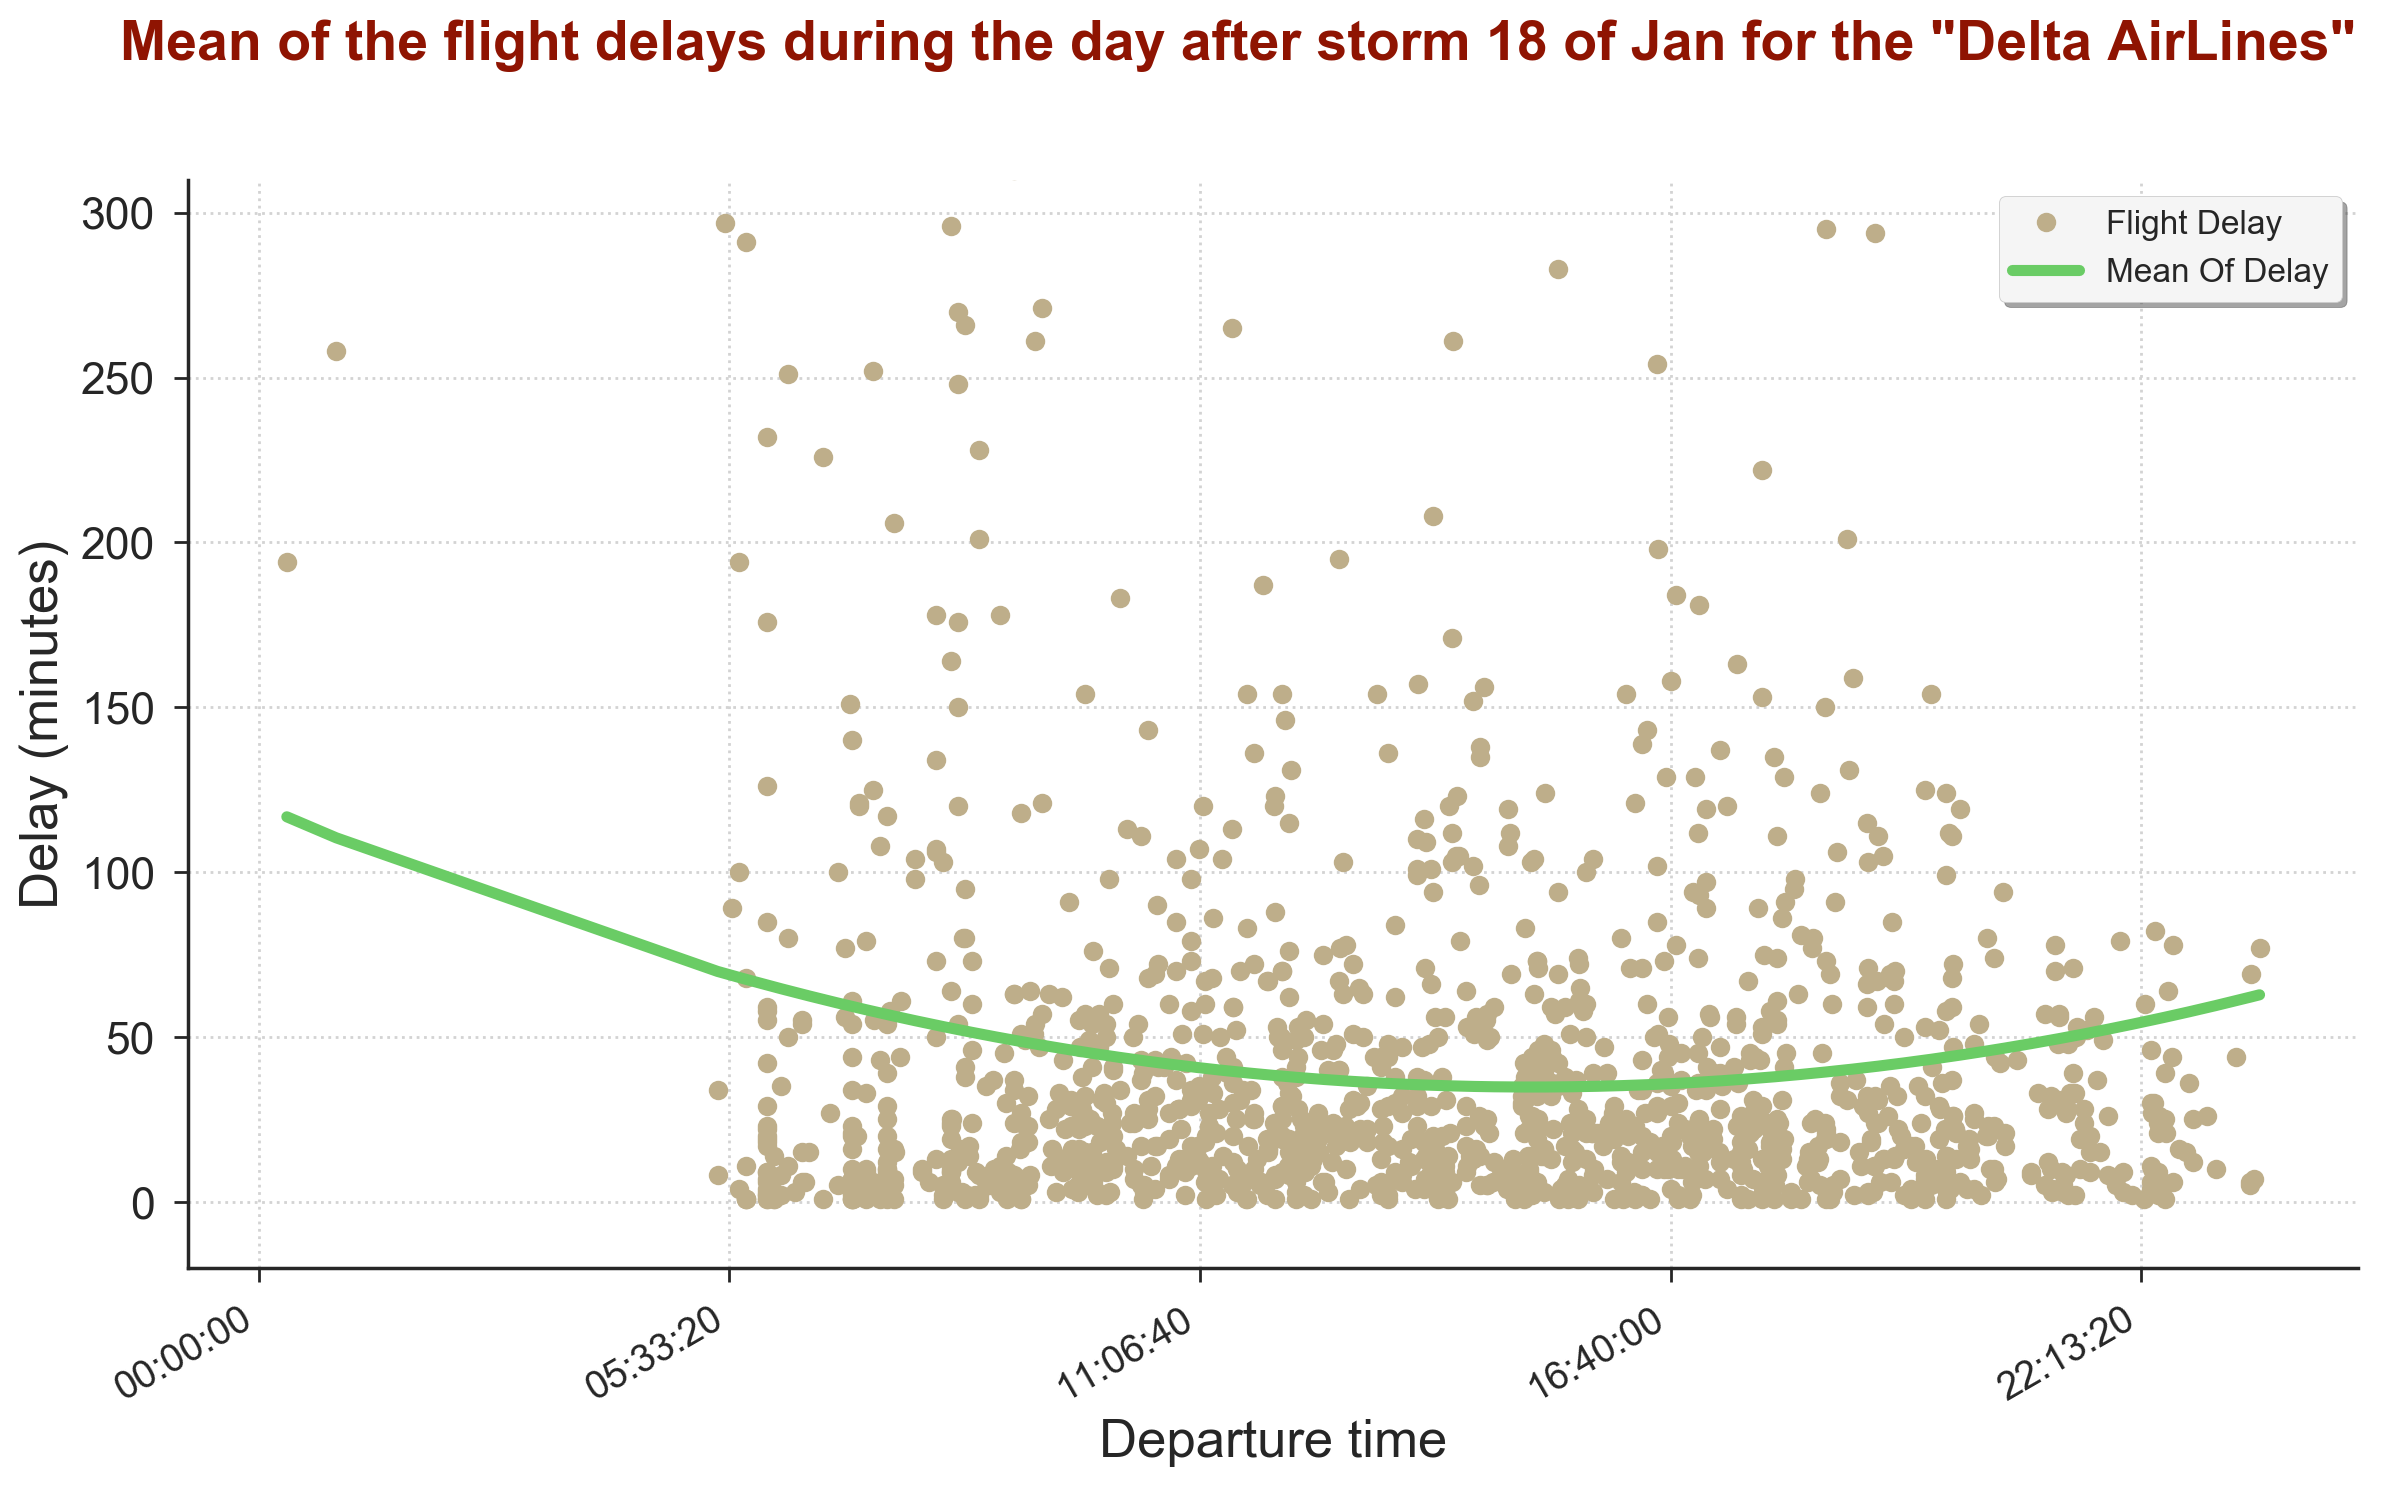

In [68]:
test3 = df111['DEPARTURE_DELAY'].groupby(df111['heure_depart']).apply(stats).unstack()
fct = lambda x: x.hour * 3600 + x.minute * 60 + x.second
x_val = np.array([fct(s) for s in test3.index]) 
y_val = test3['mean']
popt, pcov = curve_fit(func123, x_val, y_val, p0 = [1, 2, 3])
test3['fit'] = pd.Series(func123(x_val, *popt), index = test3.index)

fig1 = Figure_style(14, 8, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df111['heure_depart'], df111['DEPARTURE_DELAY'], markeredge=False, label='Flight Delay')
fig1.cust_plot(test3.index, test3['fit'], color='g', linestyle='-', linewidth=4, label='Mean Of Delay')
fig1.style() ; fig1.draw_legend('upper right')
plt.suptitle('Mean of the flight delays during the day after storm 18 of Jan for the "Delta AirLines"', size=20, color='#8f1402', weight = 'bold')
fig1.set_ylabel('Delay (minutes)', fontsize = 19)
fig1.set_xlabel('Departure time', fontsize = 19)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
fig1.set_ylim(-20, 310)

<img src="img/lin.jpg">

# <span style="color:#ffad01">15. Graph: <span style="color:#004577">Number of visited airports during one month by each Air Company.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">I will count all visited airports by each aircompany and keep it in dictionary which I will use for the graph. I will use bar plot from matplot library.

<span style="color:#1e488f">On this graph I can see that <b>Skywest Airlines</b> cover more airports in USA than any other airlines. Skywest is classified as one of the major airlines of the United States and is the largest regional airline in North America when measured by fleet size. <b>Southwest Airlines</b> not even in top 5 but has more flight than another air companies. On another hand <b>Hawaiian Airlines</b> has small number of airports visited. But Hawaiian Airlines frequently tops the on-time carrier list in the United States, as well as the fewest cancellations, oversales and baggage handling issues (Wikipedia). I can confirm this if I come back to my graph which I showed before "Domestic Departure Delays". Also as I mentioned before we can see that <b>Alaska Airlines</b> doesn't have big geography of flights around USA.

In [71]:
# Get key values pairs Airline code and their names as values, put it in to variable airComp_dict.
# ________________________________________________________
airComp_dict = df.set_index('AIRLINE_CODE')['AIRLINE'].to_dict()

# Check my dictionary.
# ________________________________________________________
airComp_dict

{'9E': 'Endeavor Air',
 'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'G4': 'Allegiant Air LLC',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OH': 'PSA Airlines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.',
 'YV': 'Messa Airlines',
 'YX': 'Republic Airlines'}

In [72]:
# Count how many airports each aircompany has visited during January 2018.
# ________________________________________________________
count_box = dict()
for i in airComp_dict.keys():
    unique_list = df[df['AIRLINE_CODE'] == i]['ORIGIN_AIRPORT'].unique()
    count_box[i] = len(unique_list)
    
# Now I can see how many airports each aircompany has visited.
# ________________________________________________________
count_box

{'9E': 115,
 'AA': 96,
 'AS': 68,
 'B6': 64,
 'DL': 146,
 'EV': 125,
 'F9': 58,
 'G4': 117,
 'HA': 17,
 'MQ': 126,
 'NK': 38,
 'OH': 94,
 'OO': 219,
 'UA': 97,
 'VX': 27,
 'WN': 86,
 'YV': 103,
 'YX': 83}

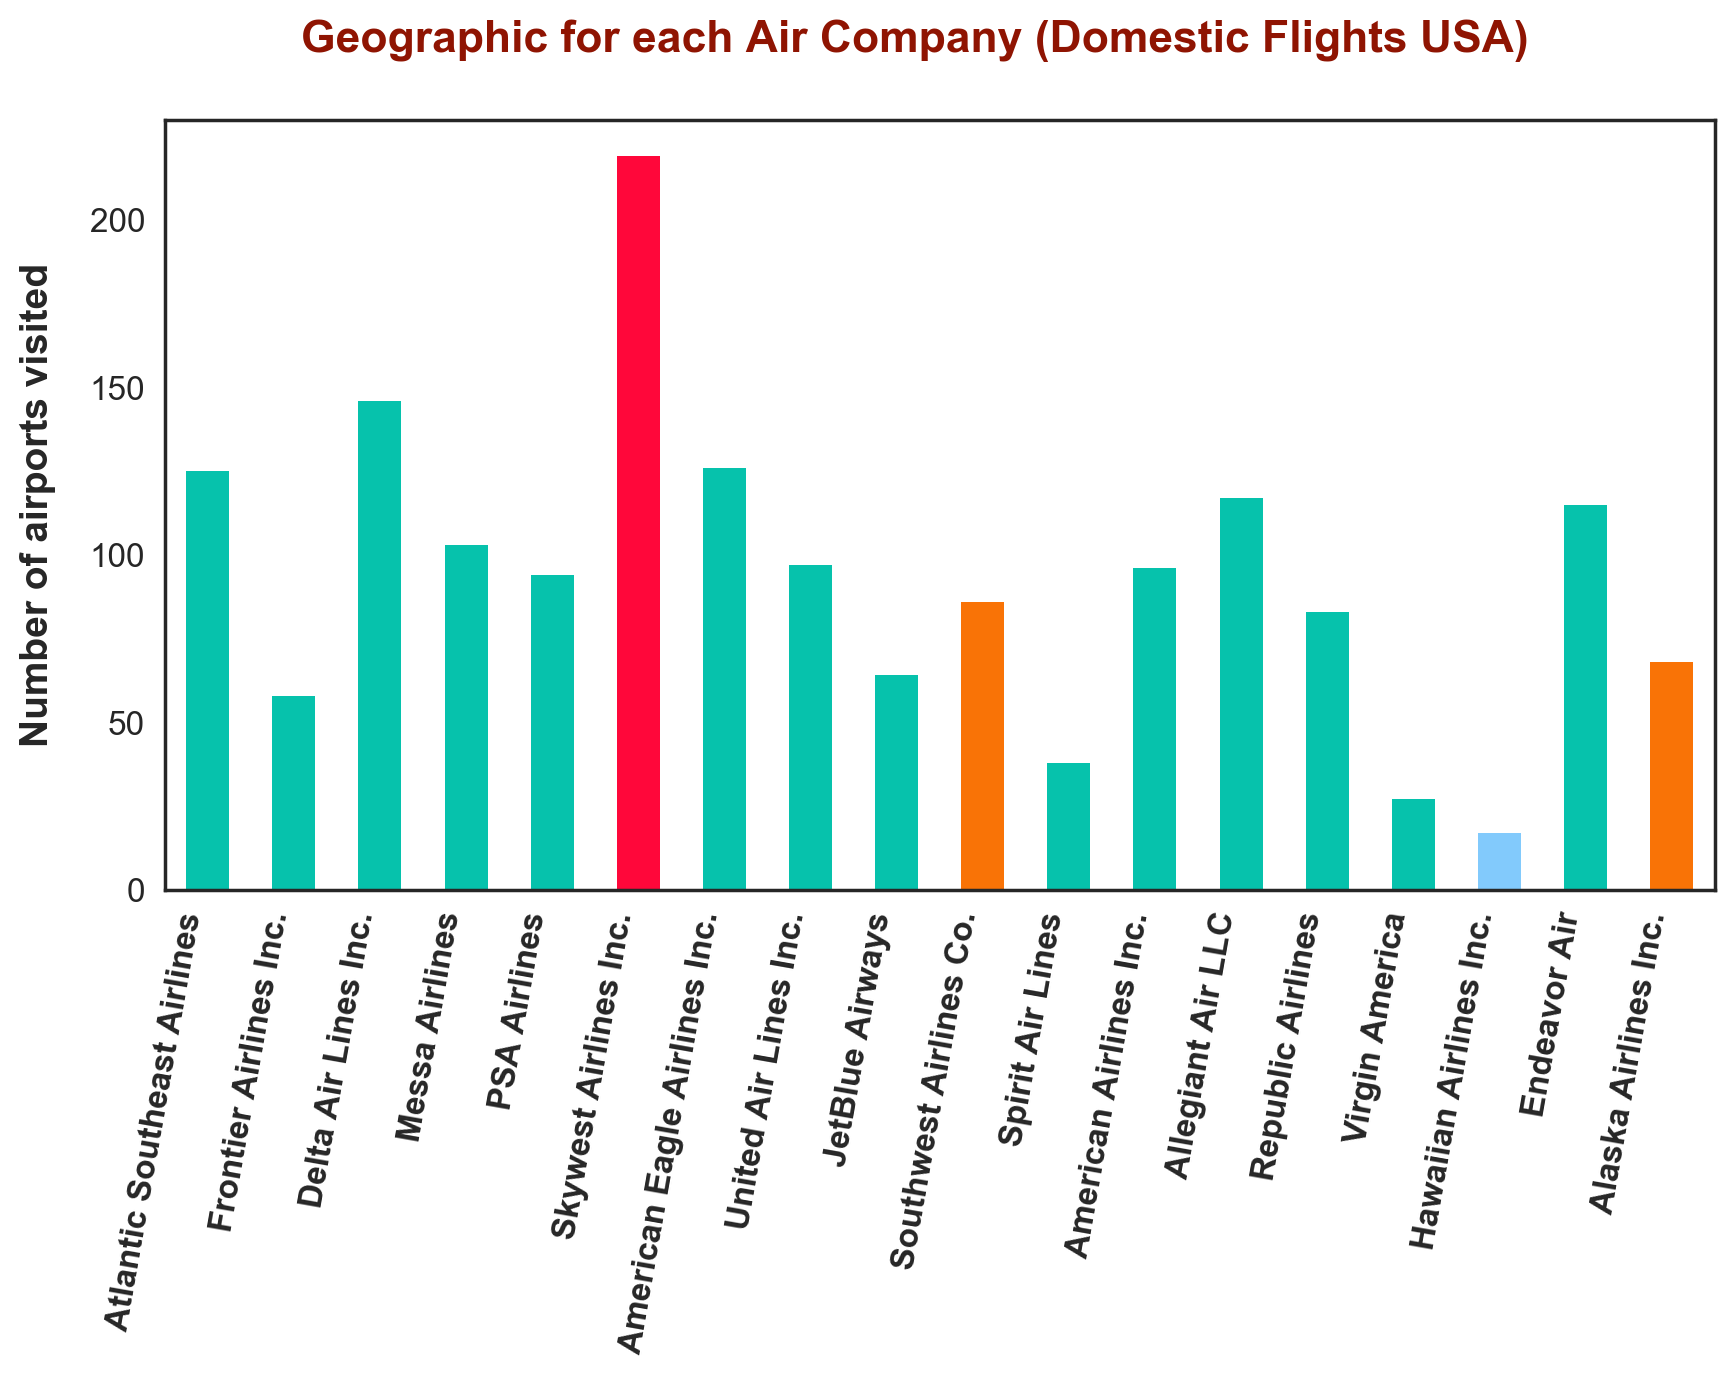

In [78]:
df_for_plot = pd.DataFrame.from_dict(count_box, orient='index') # Create DataFrame from my dictionary.
df_for_plot.rename(columns = {0:'times'}, inplace = True) # Change name for column from 0 to count
ax = df_for_plot.plot(kind='bar', figsize = (10,5), color=['#06c2ac', '#06c2ac', '#06c2ac', '#06c2ac', '#06c2ac', '#ff073a', '#06c2ac','#06c2ac','#06c2ac','#f97306','#06c2ac','#06c2ac','#06c2ac','#06c2ac','#06c2ac','#82cafc','#06c2ac','#f97306'])
names = [airComp_dict[i.get_text()] for i in ax.get_xticklabels()]
ax.set_xticklabels(names)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=12, ha = 'right', rotation = 80, weight = 'bold')
plt.suptitle('Geographic for each Air Company (Domestic Flights USA)', size=16, color='#8f1402', weight = 'bold')
ax.legend().set_visible(False)

plt.show()

<img src="img/lin.jpg">

# <span style="color:#ffad01">16. Graph: <span style="color:#004577">Number of flights by time of the day.

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">On this graph I can see that number of flight rapidly rising from the night time until 6am. Most flight seems made between 6am. and 12pm. And after that number of flights is going down, as we remember time between 12pm and 4pm. it is time when flights delays is on lower level.

In [79]:
df['departure_time_int'] = df.SCHEDULED_DEPARTURE.map(lambda x: x.hour)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 1 if x >= 0 and x < 6 else x)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 2  if x >= 6 and x < 12 else x)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 3 if x >= 12 and x < 18 else x)
df['departure_time_int'] = df['departure_time_int'].apply(lambda x: 4 if x > 3 else x)

In [80]:
df.departure_time_int.value_counts()

2    221074
3    209750
4    124255
1     14928
Name: departure_time_int, dtype: int64

In [81]:
df_N_flights_btime = pd.DataFrame(df.departure_time_int.value_counts().reset_index().values, columns=['Time of the day', 'Times'])
df_N_flights_btime.sort_values('Time of the day', inplace=True)
df_N_flights_btime.set_index('Time of the day', inplace=True)
df_N_flights_btime

Times
Time of the day        
1                 14928
2                221074
3                209750
4                124255

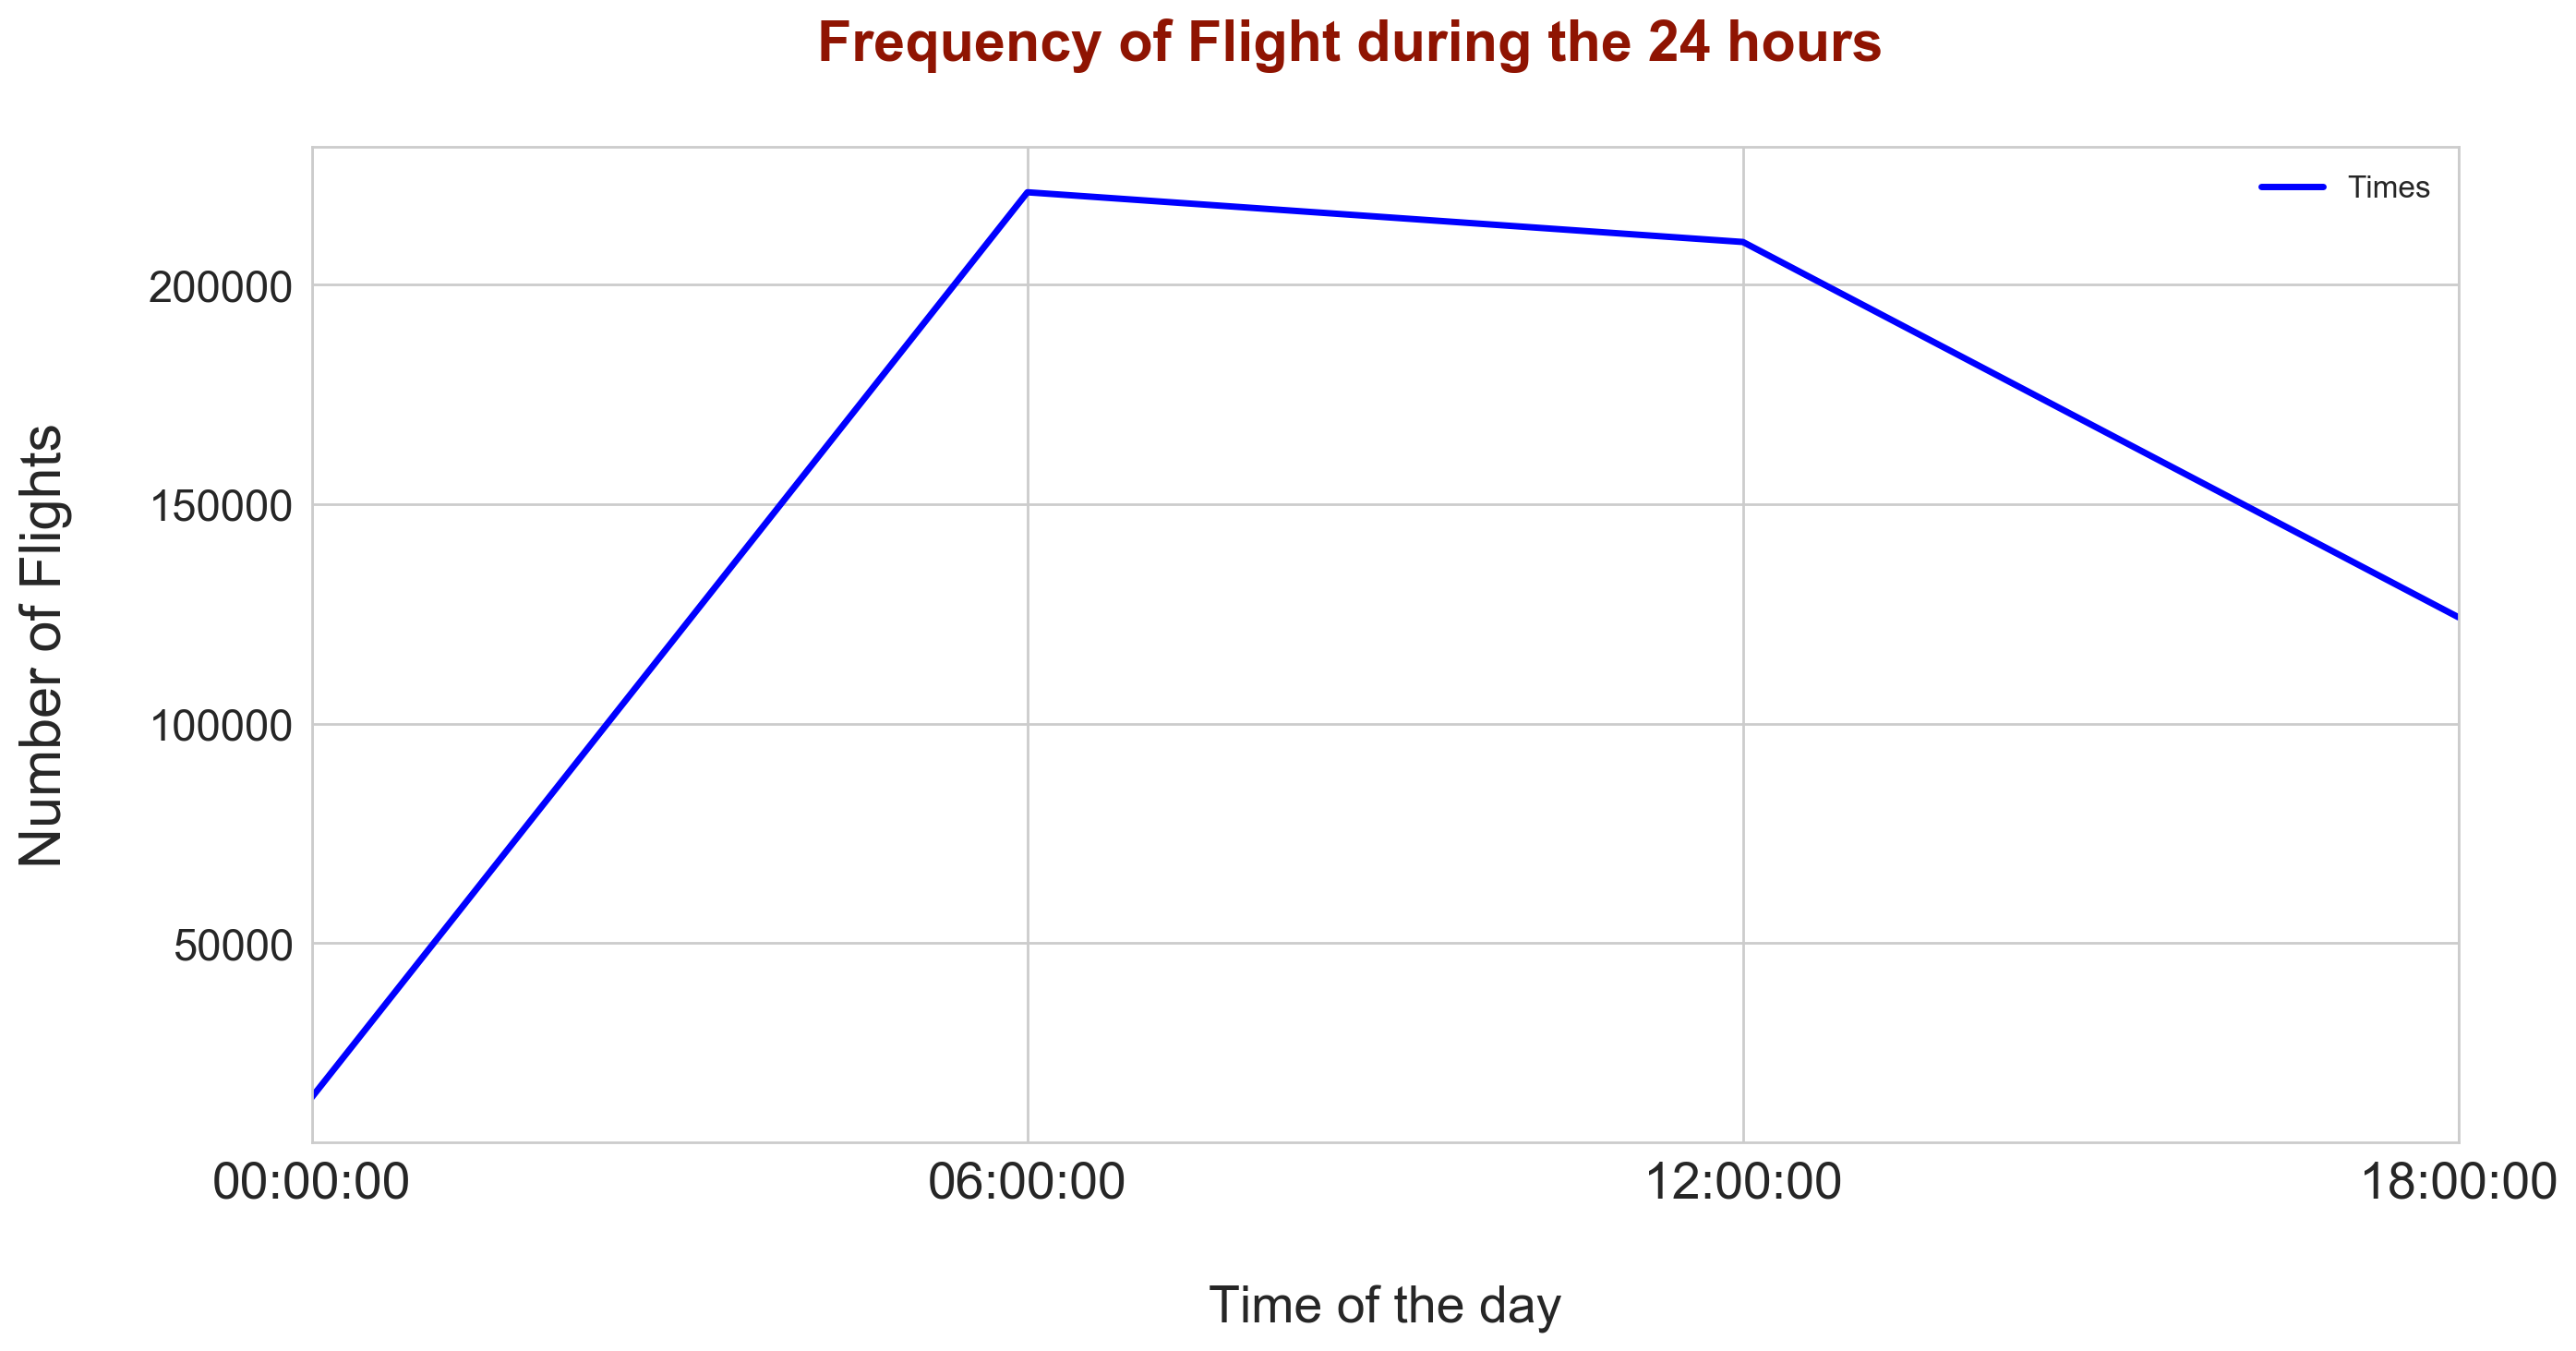

In [82]:
sns.set_style('whitegrid')


df_N_flights_btime.plot(figsize=(15,7), color='blue')

plt.suptitle('Frequency of Flight during the 24 hours', size=22, color='#8f1402', weight = 'bold')
plt.ylabel('Number of Flights', fontsize=22,  labelpad=30)
plt.xlabel('Time of the day', fontsize=20, labelpad=30)
plt.xticks([1, 2, 3, 4], ['00:00:00', '06:00:00', '12:00:00', '18:00:00'], fontsize=20)
plt.yticks(fontsize=17)

plt.show()

<img src="img/lin.jpg">

# <span style="color:#ffad01">17. Graph: <span style="color:#004577">Box plot of abnormal length of delays.

<img src="img/wheel.jpg">

<span style="color:#be0119">
<b>--- comment ---</b>

<span style="color:#1e488f">On the box plot I will show how many flights has abnormal length of the delays. American Airlines has one delay which is more than 33 hours. This type of delays could lead to inaccuracy of my model. This kind of delays are probably related to some events like (weather, breakdown, accident, e.t.c) Later on the stage preparation my features and target variable for prediction, I will get rid of outliers. Also delays which is less than 2 min I will count as no delays. All delays above 2 hours I will not include in to my modeling.

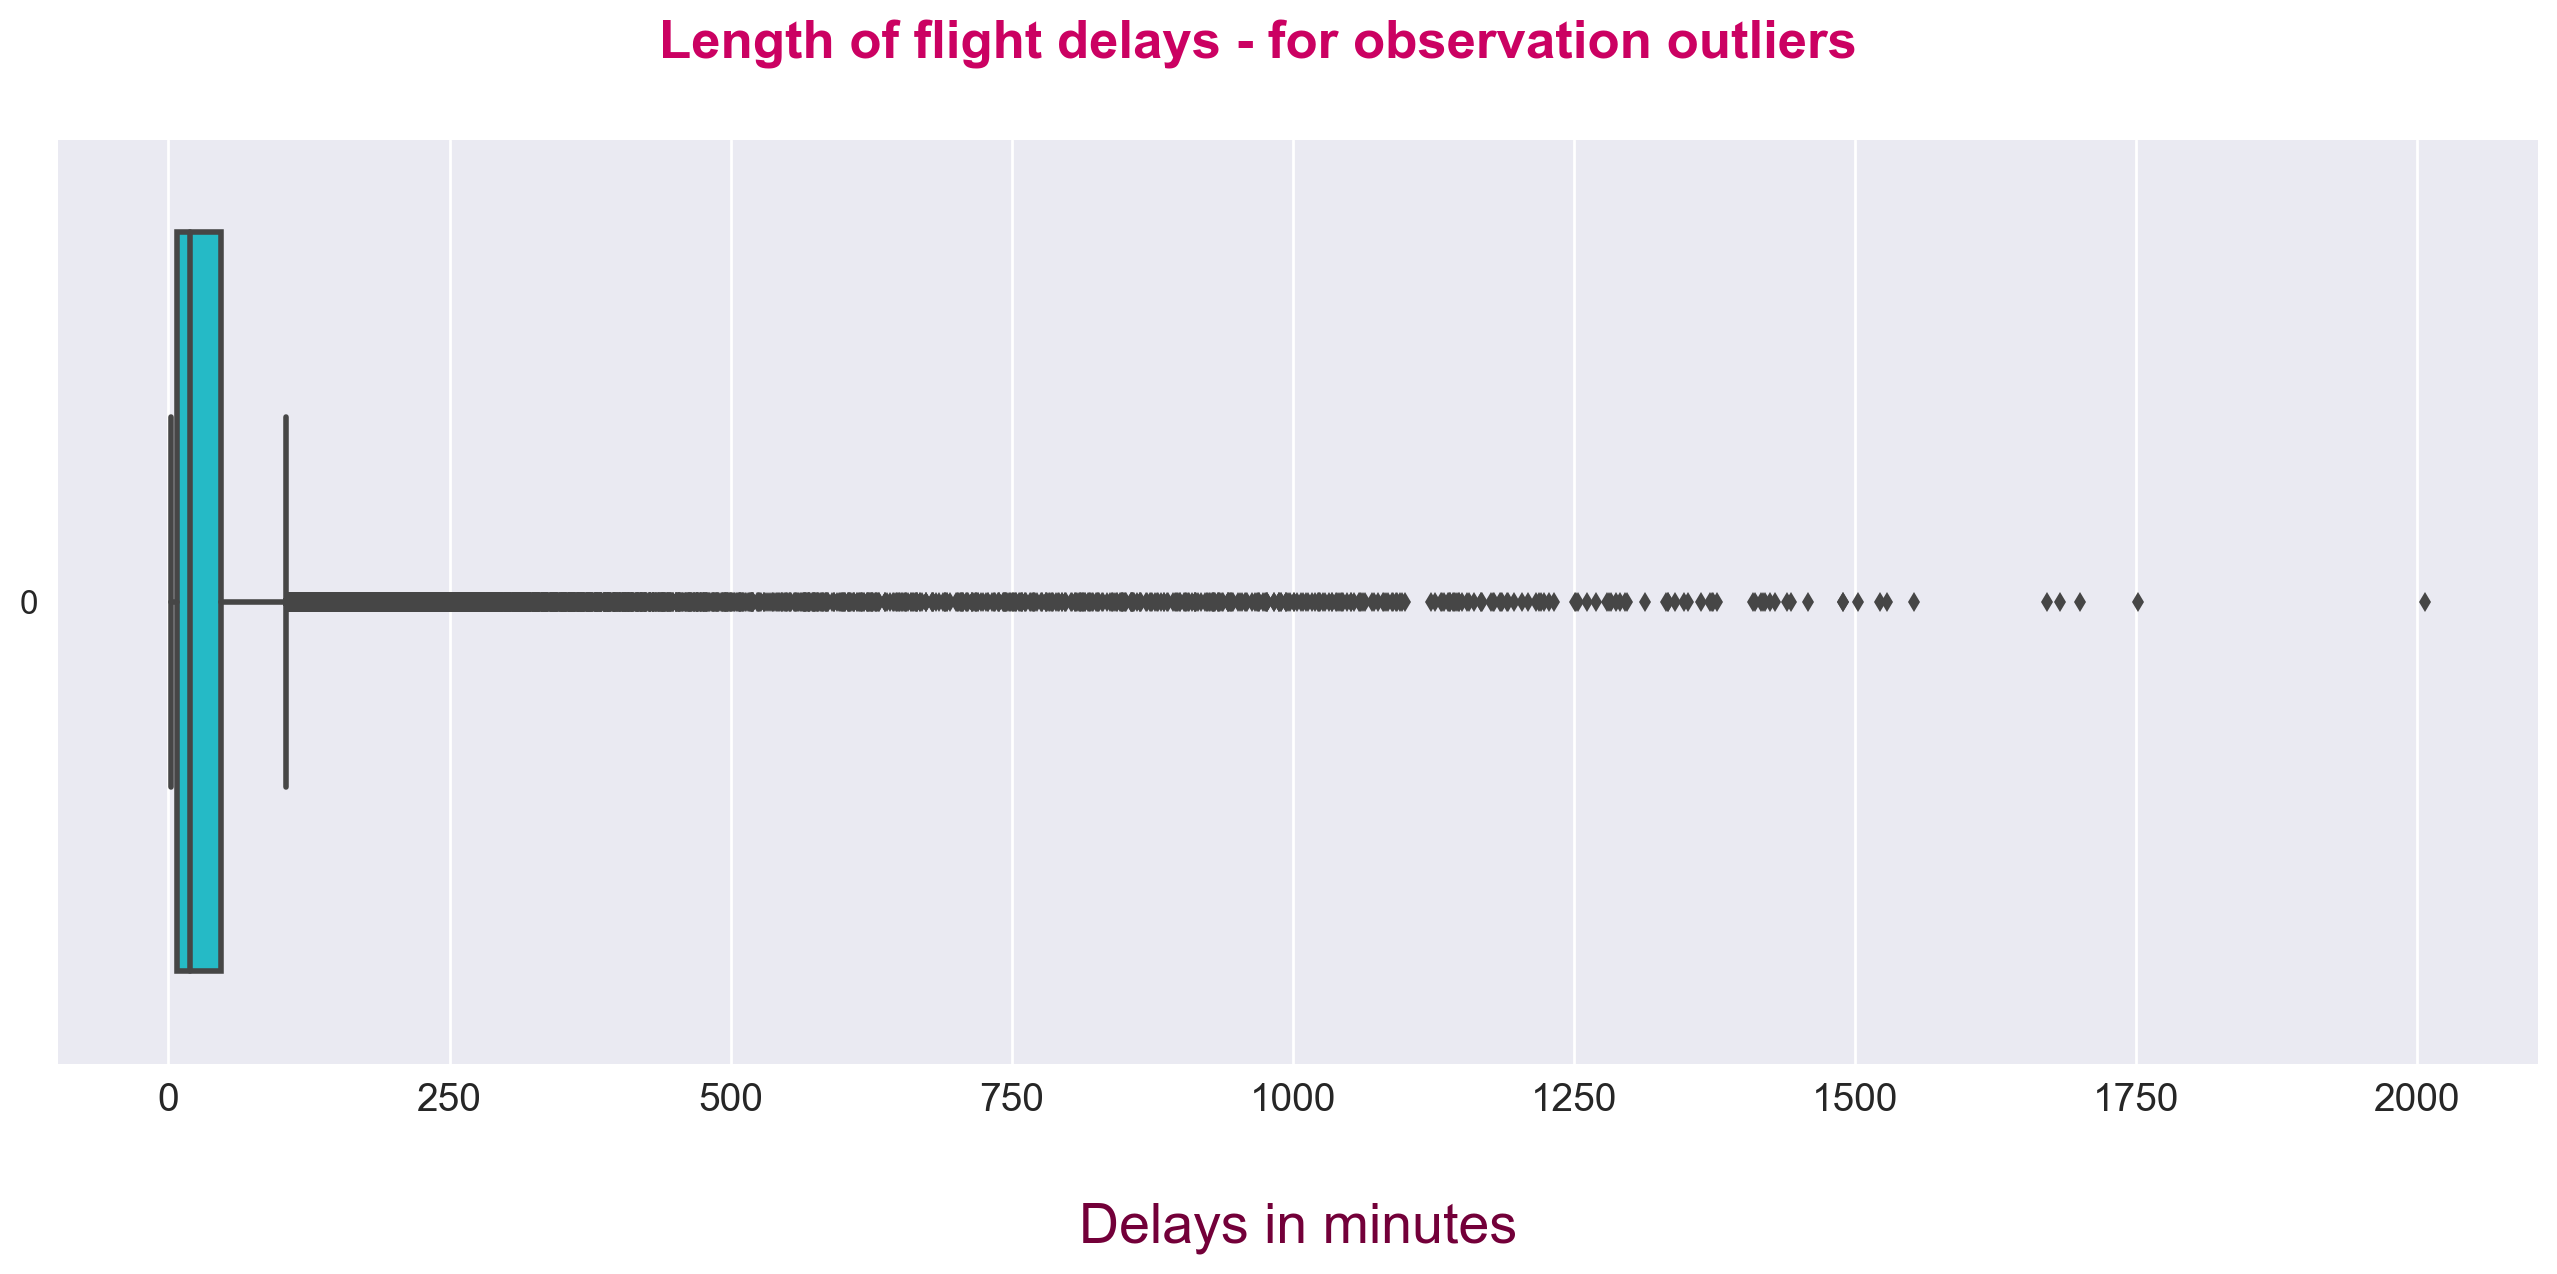

In [83]:
df_box = df[df.DEPARTURE_DELAY >= 2]

sns.set_style("darkgrid")
fig = plt.figure(1, figsize=(16,6))
ax = sns.boxplot(data=df_box.DEPARTURE_DELAY.values, orient='h', fliersize=5, linewidth=2, notch=False, saturation=0.7, color='#02d8e9')
plt.suptitle('Length of flight delays - for observation outliers', fontsize=19, color='#cb0162',  weight = 'bold')
plt.xlabel('Delays in minutes', fontsize=20, labelpad=30, color='#730039')
plt.xticks(fontsize=14)
plt.show()

<img src="img/lin.jpg">

[GO NEXT >>](./Chapter-2-features-creation-classification problem.ipynb)